In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found

/home/thakur/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
sns.set_theme()

In [3]:
all_data_path=Path('/home/thakur/lccfiles')

In [4]:
#creating a directory at lccfiles to save the efficiency files
eff_plot_dir=all_data_path/'efficiency_plots_dir'

if not eff_plot_dir.is_dir():
    print(f"{eff_plot_dir} doesnot exist, creating ...")
    eff_plot_dir.mkdir()
else:
    print(f"{eff_plot_dir} exists, processing ...")

/home/thakur/lccfiles/efficiency_plots_dir exists, processing ...


In [5]:
all_files=[i for i in all_data_path.rglob('*')]


In [6]:
#.dat files
correction_data_files=sorted([j for j in all_files if j.suffix=='.dat' and j.name.startswith('correction') and (j.parent.name==j.stem.removeprefix('correction_'))])
correction_data_files

[PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.01mm/correction_cornercorner1122_side0.01mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.025mm/correction_cornercorner1122_side0.025mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.05mm/correction_cornercorner1122_side0.05mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.1mm/correction_cornercorner1122_side0.1mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.2mm/correction_cornercorner1122_side0.2mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.3mm/correction_cornercorner1122_side0.3mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.0mm/correction_cornercorner1122_side1.0mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.25mm/correction_cornercorner1122_side1.25mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.2mm/correction_cornercorner1122_side1.2mm.dat'),
 PosixPath('/home/thakur/lccfiles/co

In [7]:
for c,file in enumerate(correction_data_files):
    print(f"{c:<4}{file}")

0   /home/thakur/lccfiles/cornercorner1122_side0.01mm/correction_cornercorner1122_side0.01mm.dat
1   /home/thakur/lccfiles/cornercorner1122_side0.025mm/correction_cornercorner1122_side0.025mm.dat
2   /home/thakur/lccfiles/cornercorner1122_side0.05mm/correction_cornercorner1122_side0.05mm.dat
3   /home/thakur/lccfiles/cornercorner1122_side0.1mm/correction_cornercorner1122_side0.1mm.dat
4   /home/thakur/lccfiles/cornercorner1122_side0.2mm/correction_cornercorner1122_side0.2mm.dat
5   /home/thakur/lccfiles/cornercorner1122_side0.3mm/correction_cornercorner1122_side0.3mm.dat
6   /home/thakur/lccfiles/cornercorner1122_side1.0mm/correction_cornercorner1122_side1.0mm.dat
7   /home/thakur/lccfiles/cornercorner1122_side1.25mm/correction_cornercorner1122_side1.25mm.dat
8   /home/thakur/lccfiles/cornercorner1122_side1.2mm/correction_cornercorner1122_side1.2mm.dat
9   /home/thakur/lccfiles/cornercorner1122_side1.30mm/correction_cornercorner1122_side1.30mm.dat
10  /home/thakur/lccfiles/cornercorner

In [8]:
! cat "{correction_data_files[0]}"

am241  am241  59.5409 2.067083e-01 5.181612e-03 5.086369e-03 4.111876e-03 4.083877e-03 1.509192e-02 1.494725e-02
pb210  pb210  46.5390 9.597140e-02 1.296506e+01 -5.242748e+00 -3.827653e+02 6.273450e+02 2.010299e-02 2.006625e-02
ra226  ra226  186.2110 7.919167e-01 3.161688e-02 3.090739e-02 2.919653e-02 2.869140e-02 1.500987e-02 1.491932e-02
ra226  pb214  241.9950 7.783093e-01 2.054300e-02 2.027855e-02 1.677014e-02 1.664422e-02 1.500987e-02 1.491932e-02
ra226  pb214  258.8600 5.904243e-01 1.357093e-01 1.305255e-01 1.355351e-01 1.304422e-01 1.500987e-02 1.491932e-02
ra226  pb214  274.8000 1.154155e+00 2.184246e-01 2.001445e-01 2.175071e-01 1.996350e-01 1.500987e-02 1.491932e-02
ra226  pb214  295.2228 8.230936e-01 1.564150e-02 1.543825e-02 9.537870e-03 9.451061e-03 1.500987e-02 1.491932e-02
ra226  pb214  351.9321 8.010619e-01 1.376020e-02 1.357495e-02 6.614226e-03 6.592530e-03 1.500987e-02 1.491932e-02
ra226  pb214  462.0200 6.805935e-01 1.824745e-01 1.728963e-01 1.824303e-01 1.719448e-01 

# INFO FROM CODE

In [9]:
  # [ words[0],        # 0: parent
  #             words[1] ],      # 0: isotope
  #           float(words[2]),   # 1: energy
  #           float(words[3]),   # 2: efficiency correction
  #           float(words[4]),   # 3: total error for a single gamma-ray (minus)
  #           float(words[5]),   # 4: total error for a single gamma-ray (plus)
  #           float(words[6]),   # 5: uncorrelated error (minus)
  #           float(words[7]),   # 6: uncorrelated error (plus)
  #           float(words[8]),   # 7: fractional correlated error (minus)
  #           float(words[9]) ]) # 8: fractional correlated error (plus)

# pyplot.errorbar(data[:,1], data[:,2], yerr=[data[:,5], data[:,6]], fmt='.' )
#count begins from 3, energy,efficiency correction,uncorrelated error minus,uncorrecleted plus

In [10]:
corr_data_column_names=['parent','isotope','energy','efficiency','total_error_minus','total_error_plus','error_minus','error_plus','correlated_error_minus','correlated_error_plus']
selected_columns=['side_dead_layer_thickness','parent','isotope','energy','efficiency','error_minus','error_plus']

In [11]:
# df=pd.read_csv(file_selected,sep='\s+',names=corr_data_column_names)
# df.insert(0,selected_columns[0],SideDeadLayerThickness) #side dead layer  is inserted 
# df

In [12]:
# df_plot=df[selected_columns]
# df_plot

In [13]:
# unique_parents=pd.unique(df_plot['parent'])
# unique_parents

In [14]:
# selected_parent='am241'
# df_parent=df_plot[df_plot['parent']==selected_parent]
# df_parent

In [15]:
selected_columns=['side_dead_layer_thickness(mm)','parent','isotope','energy','efficiency','error_minus','error_plus']
def get_parent_efficiency(selected_file,isotope=None):
    #print(f'selected_file: {selected_file}')
    side_thickness=selected_file.stem.split('_')[2].lstrip('side').rstrip('mm')
    #print(f'side_dead_layer_thickness: {side_thickness} mm\n')
    
    corr_data_column_names=['parent','isotope','energy','efficiency','total_error_minus','total_error_plus','error_minus','error_plus','correlated_error_minus','correlated_error_plus']
    
    
    df=pd.read_csv(selected_file,sep='\s+',names=corr_data_column_names)
    df.insert(0,selected_columns[0],side_thickness) #side dead layer  is inserted 
    #print(f'df:\n{df.to_string()}')
    if isotope:
        df_selected=df[selected_columns].query('parent==@isotope')
    else:
        df_selected=df.copy()
    #print(f'df_selected:\n{df_selected.to_string()}\n')
    return df_selected
    
    
    

In [16]:
dfs=[]
def get_combined_parent_efficiency(isotope=None,combined_correction_file=correction_data_files):
    for c,file in enumerate(combined_correction_file,start=1):
        print(f'{c:<2}|{len(combined_correction_file)} working with {file}\n')
        temp_df=get_parent_efficiency(file,isotope)
        #print(f'temp_df\n{temp_df}')
        dfs.append(temp_df)
    return pd.concat(dfs).sort_values(by='side_dead_layer_thickness(mm)').reset_index(drop=True)
        #get 
    

In [17]:

df_all=get_combined_parent_efficiency()
df_all

1 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.01mm/correction_cornercorner1122_side0.01mm.dat

2 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.025mm/correction_cornercorner1122_side0.025mm.dat

3 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.05mm/correction_cornercorner1122_side0.05mm.dat

4 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.1mm/correction_cornercorner1122_side0.1mm.dat

5 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.2mm/correction_cornercorner1122_side0.2mm.dat

6 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.3mm/correction_cornercorner1122_side0.3mm.dat

7 |12 working with /home/thakur/lccfiles/cornercorner1122_side1.0mm/correction_cornercorner1122_side1.0mm.dat

8 |12 working with /home/thakur/lccfiles/cornercorner1122_side1.25mm/correction_cornercorner1122_side1.25mm.dat

9 |12 working with /home/thakur/lccfiles/cornercorner1122_side1.2mm/correction_cornercorner1122_side1.

,side_dead_layer_thickness(mm),parent,isotope,energy,efficiency,total_error_minus,total_error_plus,error_minus,error_plus,correlated_error_minus,correlated_error_plus
0,0.01,am241,am241,59.5409,0.206708,0.005182,0.005086,0.004112,0.004084,0.015092,0.014947
1,0.01,ra226,bi214,1207.6800,0.722682,0.120603,0.114803,0.119853,0.114573,0.015010,0.014919
2,0.01,ra226,bi214,1238.1220,0.848207,0.026895,0.026488,0.023601,0.023323,0.015010,0.014919
3,0.01,ra226,bi214,1280.9760,0.791101,0.059216,0.057754,0.057684,0.056521,0.015010,0.014919
4,0.01,ra226,bi214,1377.6690,0.831613,0.032476,0.031972,0.029939,0.029461,0.015010,0.014919
...,...,...,...,...,...,...,...,...,...,...,...
594,1.5,ra226,bi214,934.0560,0.906680,0.038671,0.037796,0.036051,0.035420,0.015085,0.014950
595,1.5,ra226,bi214,964.0800,0.923667,0.169669,0.159271,0.169329,0.158486,0.015085,0.014950
596,1.5,ra226,bi214,1051.9600,0.976475,0.180338,0.168494,0.179873,0.168696,0.015085,0.014950
597,1.5,ra226,pb214,580.1400,1.259685,0.243385,0.223215,0.243055,0.222899,0.015085,0.014950


In [18]:
#saving df_all to eff_plot_dir
df_all.to_csv(eff_plot_dir/'all_efficiencies.csv',index=False)

In [19]:
def get_plot_parent_isotope_energy(df_plot:pd.DataFrame):
    """
    create a plot for given dataframe which includes the name of parent, isotope, energy
    """
    parent=df_plot['parent'].iloc[0]
    isotope=df_plot['isotope'].iloc[0]
    energy=df_plot['energy'].iloc[0]

    title_name=f'Efficiency_vs_sidedeadlayerthickness [parent:{parent}, isotope:{isotope}, energy:{energy:0.2f} keV]'
    save_name=f'efficiency_{parent}_{isotope}_{energy:.2f}'
    
    
    fig,ax=plt.subplots(figsize=(16,10))
    x=df_plot['side_dead_layer_thickness(mm)']
    y=df_plot['efficiency']
    y_error=[df_plot['error_minus'],df_plot['error_plus']]

    #fig,ax=plt.figure()

    ax.errorbar(x,y,y_error,ecolor='r',fmt='b.')
    h_line_style={'color':'m','linestyle':'--','linewidth':0.5}
    ax.axhline(y=1,**h_line_style)
    ax.set_xlabel('side_dead_layer_thickness [mm]')
    ax.set_ylabel('efficiency [%]')
    ax.set_title(title_name)
    ax.grid(False)
    fig.tight_layout()
    
    #saving into a dir
    print(f'saving as: {save_name} pdf/png')
    fig.savefig(eff_plot_dir/f'{save_name}.pdf')
    fig.savefig(eff_plot_dir/f'{save_name}.png',bbox_inches='tight',dpi=300)

    plt.show()
    
    

    

In [20]:

df_all['y_error']=(df_all['error_minus']+df_all['error_plus'])/2.0

In [21]:
#group df by thickness,then parent
isotope='ra226'
df_plot=df_all.query('parent==@isotope').query('total_error_plus>0 and total_error_minus>0')[selected_columns].reset_index(drop=True) #making the error positive
df_plot

,side_dead_layer_thickness(mm),parent,isotope,energy,efficiency,error_minus,error_plus
0,0.01,ra226,bi214,1207.680,0.722682,0.119853,0.114573
1,0.01,ra226,bi214,1238.122,0.848207,0.023601,0.023323
2,0.01,ra226,bi214,1280.976,0.791101,0.057684,0.056521
3,0.01,ra226,bi214,1377.669,0.831613,0.029939,0.029461
4,0.01,ra226,bi214,1385.310,0.815573,0.088835,0.086480
...,...,...,...,...,...,...,...
570,1.5,ra226,bi214,934.056,0.906680,0.036051,0.035420
571,1.5,ra226,bi214,964.080,0.923667,0.169329,0.158486
572,1.5,ra226,bi214,1051.960,0.976475,0.179873,0.168696
573,1.5,ra226,pb214,580.140,1.259685,0.243055,0.222899



1:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  386.78    0.507804     0.171668    0.162823
1                          0.025  ra226   bi214  386.78    0.631412     0.221666    0.205716
2                           0.05  ra226   bi214  386.78    0.541648     0.184980    0.174497
3                            0.1  ra226   bi214  386.78    0.586520     0.208767    0.192282
4                            0.2  ra226   bi214  386.78    0.559350     0.191958    0.180007
5                            0.3  ra226   bi214  386.78    0.590370     0.205823    0.192035
6                            1.0  ra226   bi214  386.78    0.503743     0.168570    0.160708
7                            1.2  ra226   bi214  386.78    0.682219     0.252090    0.225693
8                           1.25  ra226   bi214  386.78    0.688354     0.255054    0.227367
9                           1.30  ra226   bi214  386.78    0

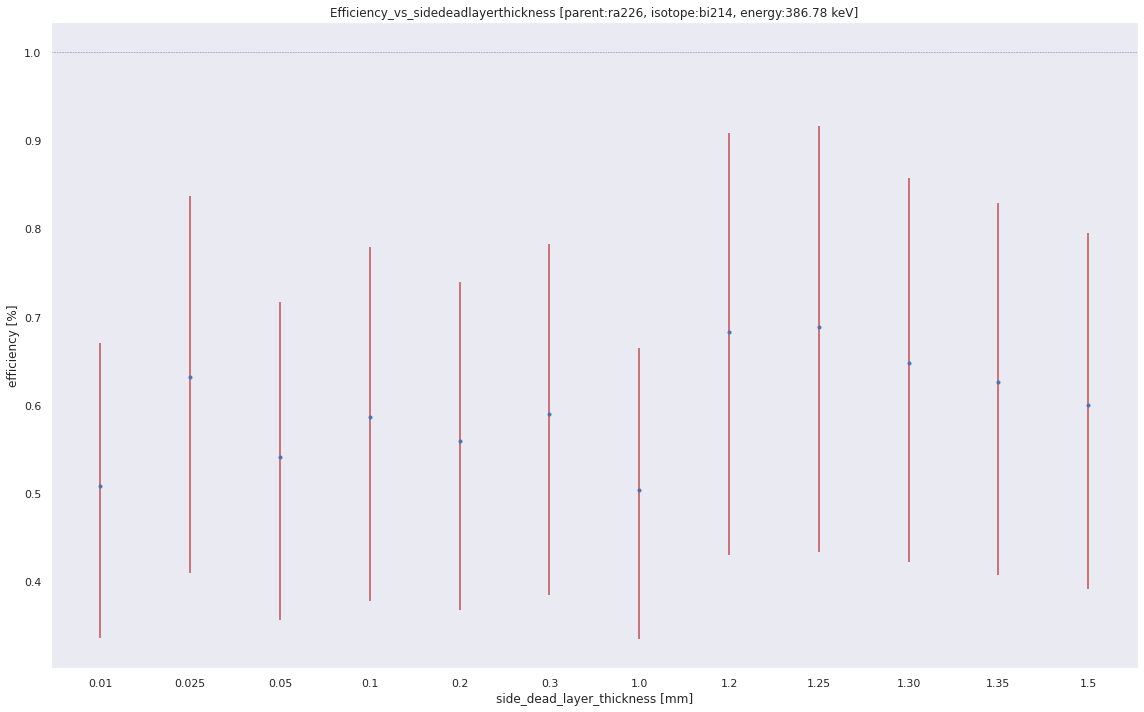


2:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  454.79    0.723983     0.189181    0.179674
1                          0.025  ra226   bi214  454.79    0.642002     0.165063    0.157347
2                           0.05  ra226   bi214  454.79    0.651317     0.166223    0.158942
3                            0.1  ra226   bi214  454.79    0.820578     0.229763    0.210233
4                            0.2  ra226   bi214  454.79    0.827752     0.219634    0.207393
5                            0.3  ra226   bi214  454.79    0.716459     0.185772    0.177396
6                            1.0  ra226   bi214  454.79    0.644246     0.163748    0.157485
7                            1.2  ra226   bi214  454.79    0.809658     0.223985    0.206624
8                           1.25  ra226   bi214  454.79    0.847961     0.238257    0.217482
9                           1.30  ra226   bi214  454.79    1

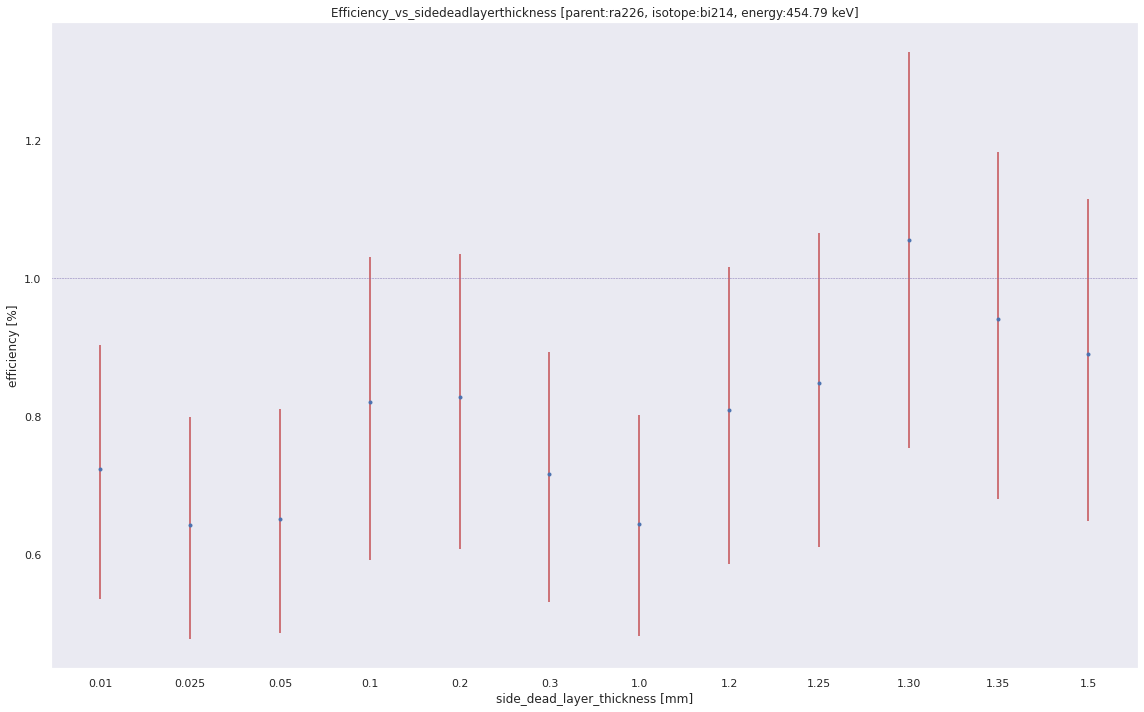


3:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  609.32    0.806561     0.007126    0.007065
1                          0.025  ra226   bi214  609.32    0.811873     0.007116    0.007077
2                           0.05  ra226   bi214  609.32    0.814534     0.007157    0.007095
3                            0.1  ra226   bi214  609.32    0.821533     0.007274    0.007225
4                            0.2  ra226   bi214  609.32    0.830391     0.007304    0.007240
5                            0.3  ra226   bi214  609.32    0.832429     0.007257    0.007219
6                            1.0  ra226   bi214  609.32    0.884878     0.007838    0.007793
7                            1.2  ra226   bi214  609.32    0.902749     0.008117    0.008059
8                           1.25  ra226   bi214  609.32    0.914863     0.008217    0.008174
9                           1.30  ra226   bi214  609.32    0

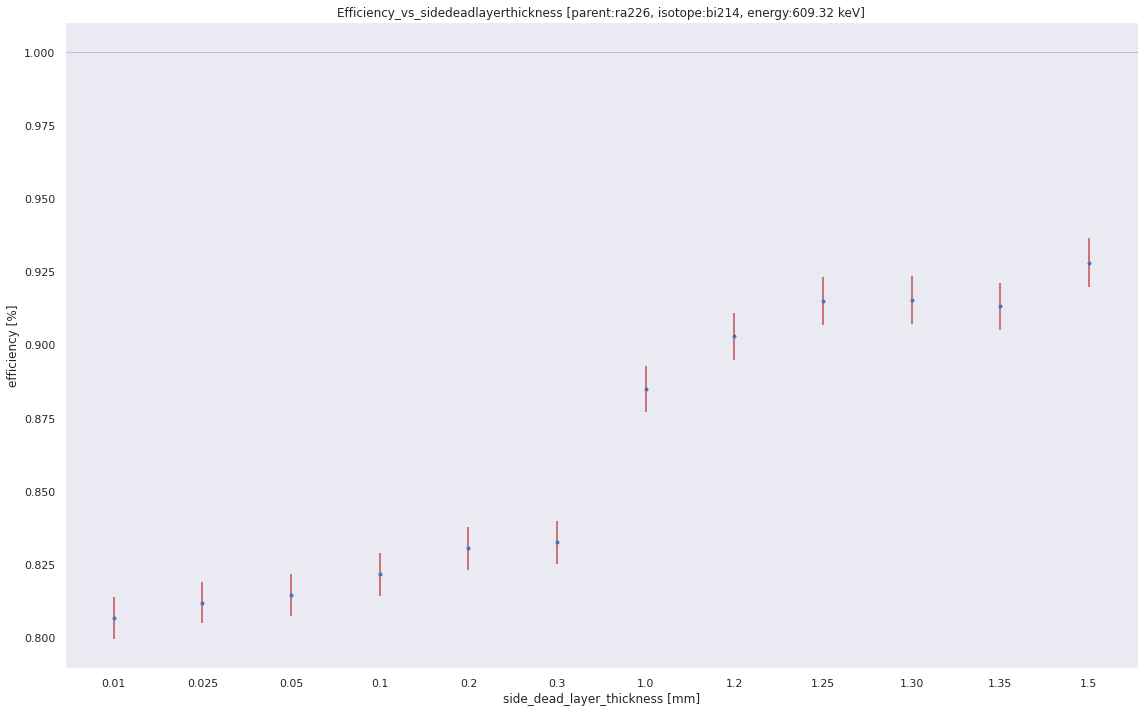


4:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  665.447    0.854814     0.049325    0.048302
1                          0.025  ra226   bi214  665.447    0.831180     0.047414    0.046454
2                           0.05  ra226   bi214  665.447    0.738610     0.041367    0.040752
3                            0.1  ra226   bi214  665.447    0.806790     0.047724    0.046537
4                            0.2  ra226   bi214  665.447    0.827021     0.047227    0.046431
5                            0.3  ra226   bi214  665.447    0.858312     0.049227    0.048382
6                            1.0  ra226   bi214  665.447    0.880008     0.050815    0.049860
7                            1.2  ra226   bi214  665.447    0.887871     0.053555    0.052255
8                           1.25  ra226   bi214  665.447    0.910625     0.055450    0.053979
9                           1.30  ra226   bi214  6

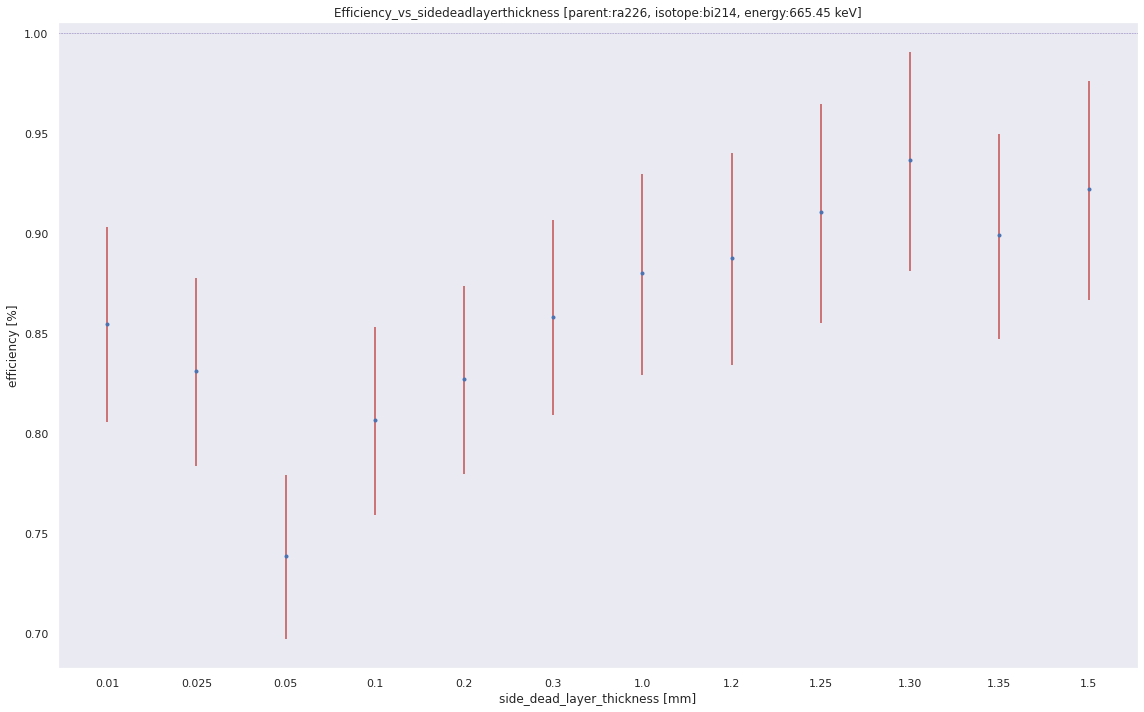


5:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  703.11    0.911293     0.126019    0.120121
1                          0.025  ra226   bi214  703.11    0.887781     0.119478    0.114901
2                           0.05  ra226   bi214  703.11    0.934504     0.127162    0.122246
3                            0.1  ra226   bi214  703.11    1.101220     0.167010    0.155820
4                            0.2  ra226   bi214  703.11    1.049692     0.145478    0.138257
5                            0.3  ra226   bi214  703.11    0.935510     0.127782    0.122294
6                            1.0  ra226   bi214  703.11    1.045535     0.144734    0.138015
7                            1.2  ra226   bi214  703.11    1.005796     0.146798    0.138166
8                           1.25  ra226   bi214  703.11    1.005103     0.146329    0.137688
9                           1.30  ra226   bi214  703.11    1

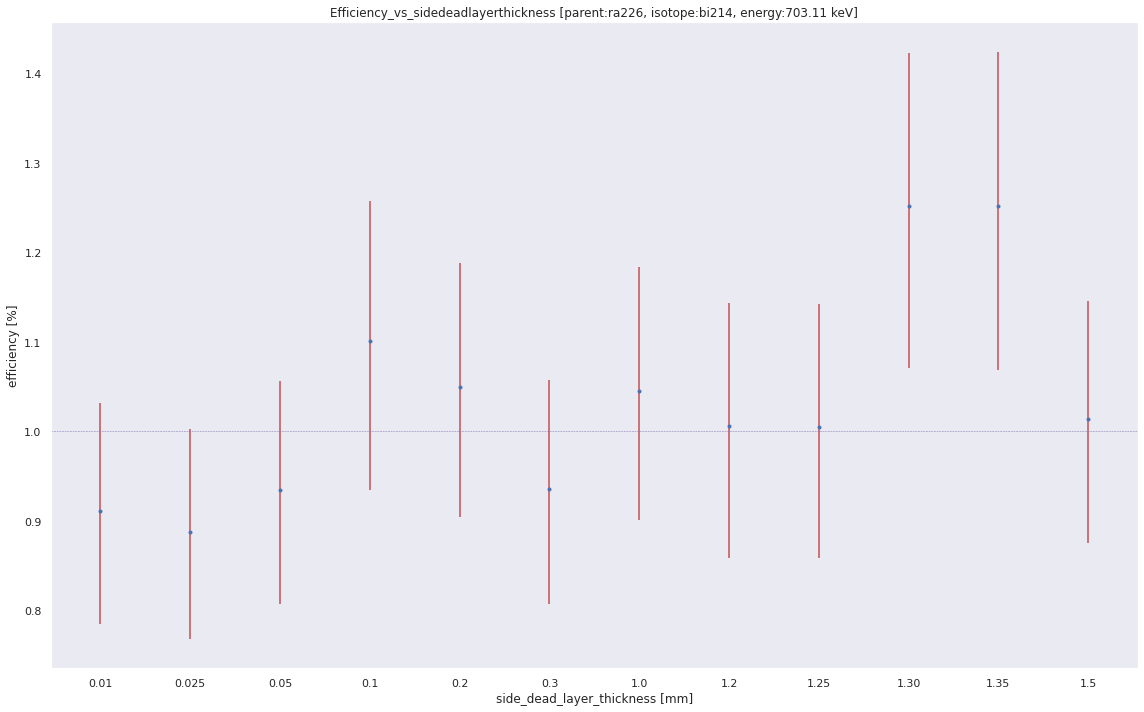


6:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  719.87    0.761991     0.140268    0.133159
1                          0.025  ra226   bi214  719.87    0.691611     0.122838    0.117727
2                           0.05  ra226   bi214  719.87    0.776836     0.145366    0.137392
3                            0.1  ra226   bi214  719.87    0.672593     0.124047    0.117866
4                            0.2  ra226   bi214  719.87    0.768687     0.139244    0.133361
5                            0.3  ra226   bi214  719.87    0.765725     0.139416    0.132806
6                            1.0  ra226   bi214  719.87    0.737371     0.132057    0.126582
7                            1.2  ra226   bi214  719.87    0.687141     0.126962    0.120394
8                           1.25  ra226   bi214  719.87    0.746997     0.142712    0.133504
9                           1.30  ra226   bi214  719.87    0

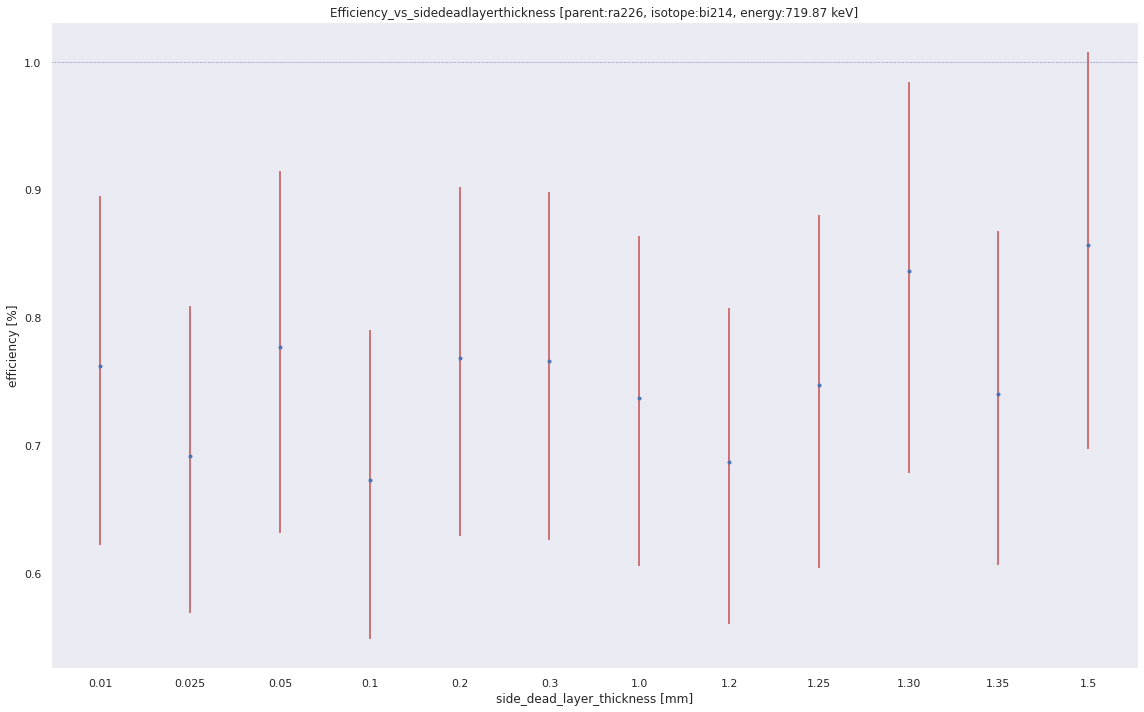


7:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  768.36    0.814154     0.023012    0.022816
1                          0.025  ra226   bi214  768.36    0.809702     0.022926    0.022699
2                           0.05  ra226   bi214  768.36    0.806381     0.022731    0.022531
3                            0.1  ra226   bi214  768.36    0.820840     0.023748    0.023527
4                            0.2  ra226   bi214  768.36    0.822809     0.023265    0.023035
5                            0.3  ra226   bi214  768.36    0.855788     0.024344    0.023988
6                            1.0  ra226   bi214  768.36    0.883115     0.025365    0.025073
7                            1.2  ra226   bi214  768.36    0.912830     0.026855    0.026526
8                           1.25  ra226   bi214  768.36    0.929363     0.027631    0.027232
9                           1.30  ra226   bi214  768.36    0

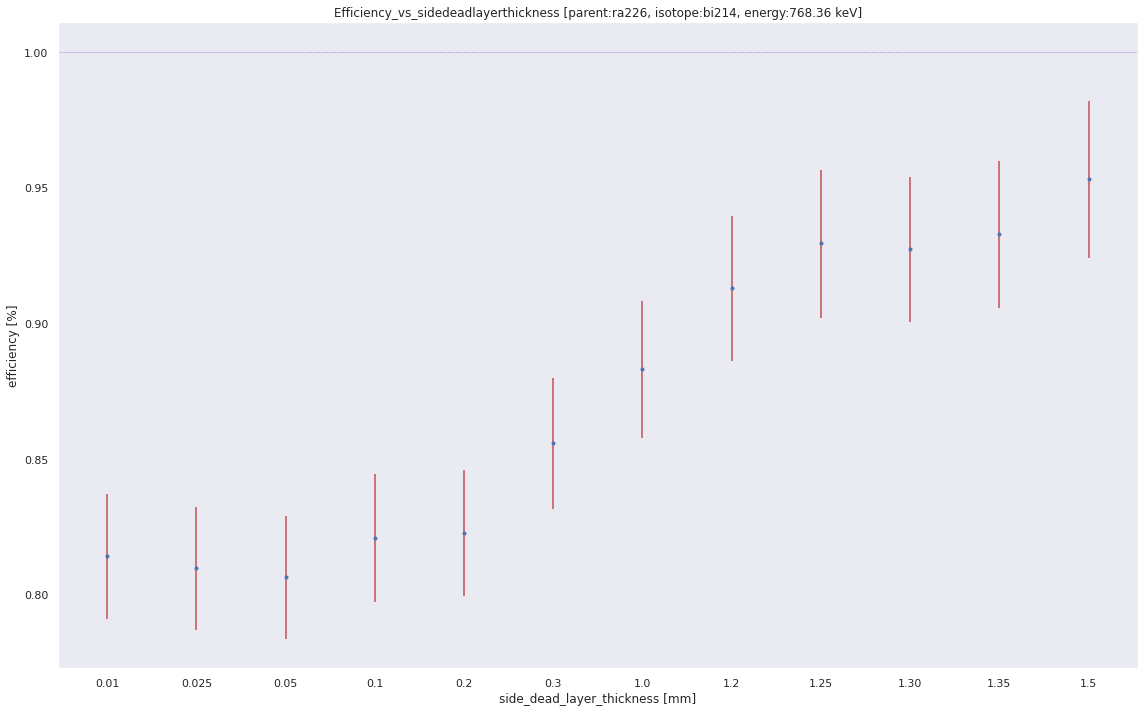


8:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  934.056    0.790740     0.029684    0.029235
1                          0.025  ra226   bi214  934.056    0.832340     0.031647    0.031135
2                           0.05  ra226   bi214  934.056    0.805438     0.030406    0.029880
3                            0.1  ra226   bi214  934.056    0.812246     0.031907    0.031475
4                            0.2  ra226   bi214  934.056    0.818133     0.030952    0.030584
5                            0.3  ra226   bi214  934.056    0.845363     0.031906    0.031351
6                            1.0  ra226   bi214  934.056    0.891057     0.034259    0.033608
7                            1.2  ra226   bi214  934.056    0.859623     0.033926    0.033375
8                           1.25  ra226   bi214  934.056    0.879419     0.035078    0.034353
9                           1.30  ra226   bi214  9

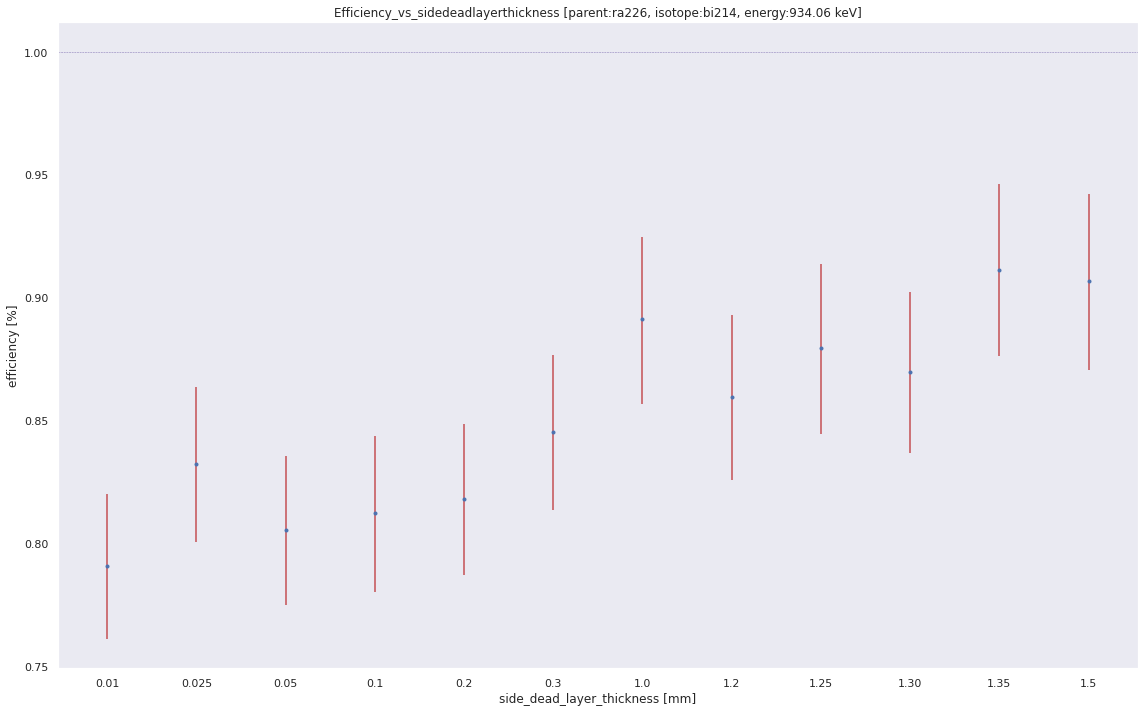


9:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  964.08    0.979892     0.179567    0.168532
1                          0.025  ra226   bi214  964.08    1.096614     0.203201    0.190530
2                           0.05  ra226   bi214  964.08    0.796132     0.138511    0.131787
3                            0.1  ra226   bi214  964.08    0.861073     0.161907    0.150891
4                            0.2  ra226   bi214  964.08    0.807887     0.140884    0.133968
5                            0.3  ra226   bi214  964.08    0.982280     0.178515    0.167919
6                            1.0  ra226   bi214  964.08    0.851161     0.157047    0.146788
7                            1.2  ra226   bi214  964.08    0.916218     0.173034    0.160635
8                           1.25  ra226   bi214  964.08    1.197420     0.249920    0.223997
9                           1.30  ra226   bi214  964.08    0

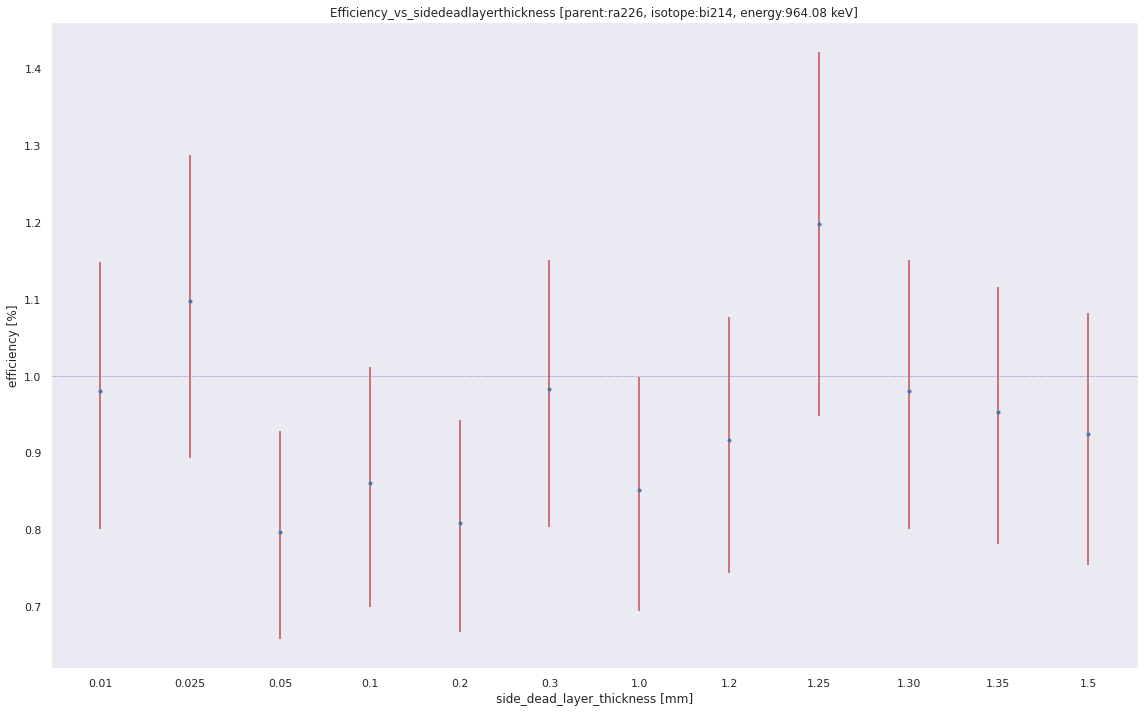


10:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1051.96    0.767283     0.136958    0.129282
1                          0.025  ra226   bi214  1051.96    1.095152     0.213271    0.196213
2                           0.05  ra226   bi214  1051.96    0.905257     0.166895    0.156058
3                            0.1  ra226   bi214  1051.96    0.901799     0.178146    0.162956
4                            0.2  ra226   bi214  1051.96    0.998184     0.189645    0.176099
5                            0.3  ra226   bi214  1051.96    0.979982     0.186208    0.172721
6                            1.0  ra226   bi214  1051.96    0.937497     0.172852    0.161863
7                            1.2  ra226   bi214  1051.96    0.897202     0.176996    0.162510
8                           1.25  ra226   bi214  1051.96    1.153016     0.247784    0.219772
9                           1.30  ra226   bi214  

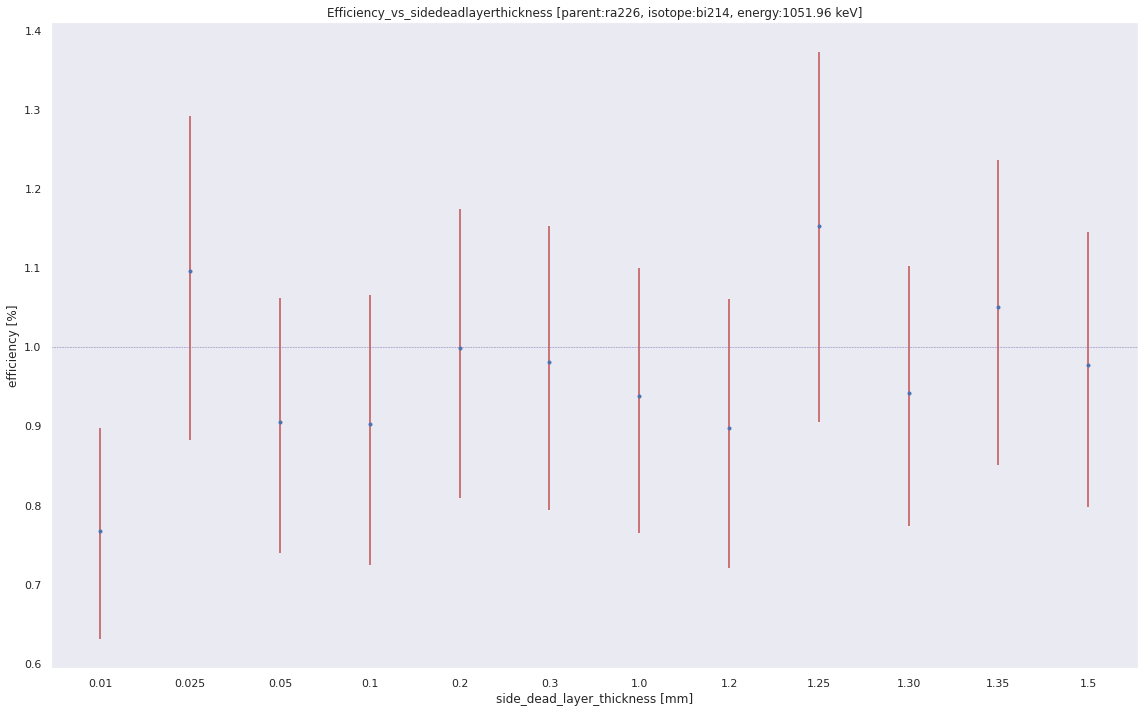


11:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1069.96    0.713547     0.183377    0.167702
1                          0.025  ra226   bi214  1069.96    0.810424     0.200861    0.187388
2                           0.05  ra226   bi214  1069.96    0.827404     0.208819    0.192567
3                            0.1  ra226   bi214  1069.96    0.619205     0.153262    0.141782
4                            0.2  ra226   bi214  1069.96    0.773144     0.202400    0.183049
5                            0.3  ra226   bi214  1069.96    0.588983     0.141053    0.133085
6                            1.0  ra226   bi214  1069.96    0.794044     0.195540    0.181989
7                            1.2  ra226   bi214  1069.96    0.828086     0.219658    0.197909
8                           1.25  ra226   bi214  1069.96    0.758853     0.201230    0.181233
9                           1.30  ra226   bi214  

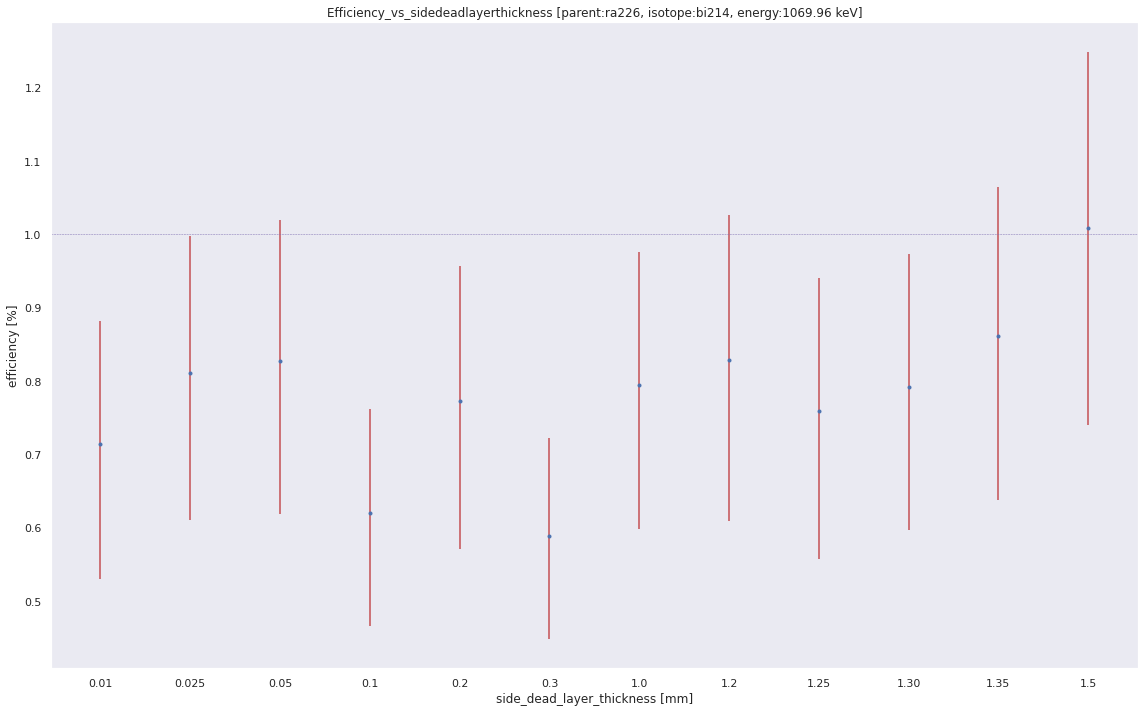


12:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1120.294    0.835119     0.013949    0.013866
1                          0.025  ra226   bi214  1120.294    0.833246     0.013828    0.013729
2                           0.05  ra226   bi214  1120.294    0.834700     0.013824    0.013662
3                            0.1  ra226   bi214  1120.294    0.843966     0.014340    0.014231
4                            0.2  ra226   bi214  1120.294    0.851072     0.014209    0.014040
5                            0.3  ra226   bi214  1120.294    0.870667     0.014479    0.014375
6                            1.0  ra226   bi214  1120.294    0.898734     0.014996    0.014902
7                            1.2  ra226   bi214  1120.294    0.927147     0.016007    0.015867
8                           1.25  ra226   bi214  1120.294    0.944124     0.016344    0.016222
9                           1.30  ra226

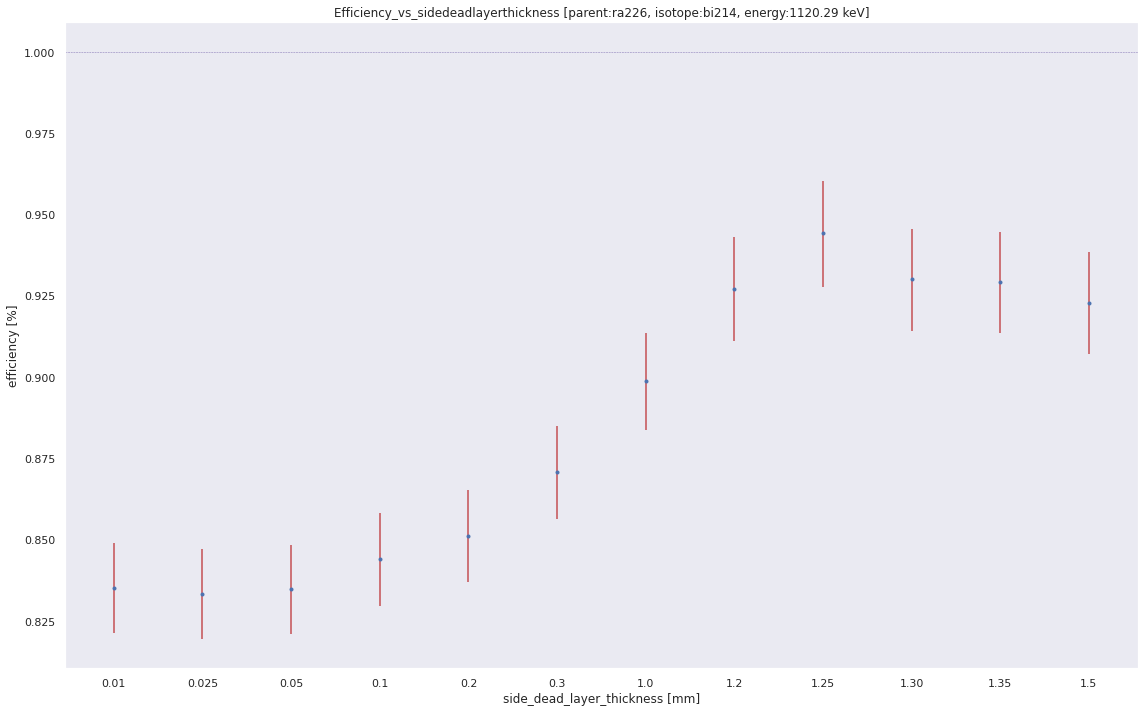


13:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1133.66    1.084182     0.255198    0.231608
1                          0.025  ra226   bi214  1133.66    0.859710     0.191642    0.176966
2                           0.05  ra226   bi214  1133.66    0.819623     0.173615    0.163208
3                            0.1  ra226   bi214  1133.66    0.749896     0.168557    0.155883
4                            0.2  ra226   bi214  1133.66    0.855123     0.189372    0.175212
5                            0.3  ra226   bi214  1133.66    0.893381     0.200212    0.184537
6                            1.0  ra226   bi214  1133.66    0.811037     0.176649    0.165193
7                            1.2  ra226   bi214  1133.66    0.944200     0.224325    0.202361
8                           1.25  ra226   bi214  1133.66    0.798746     0.182207    0.166152
9                           1.30  ra226   bi214  

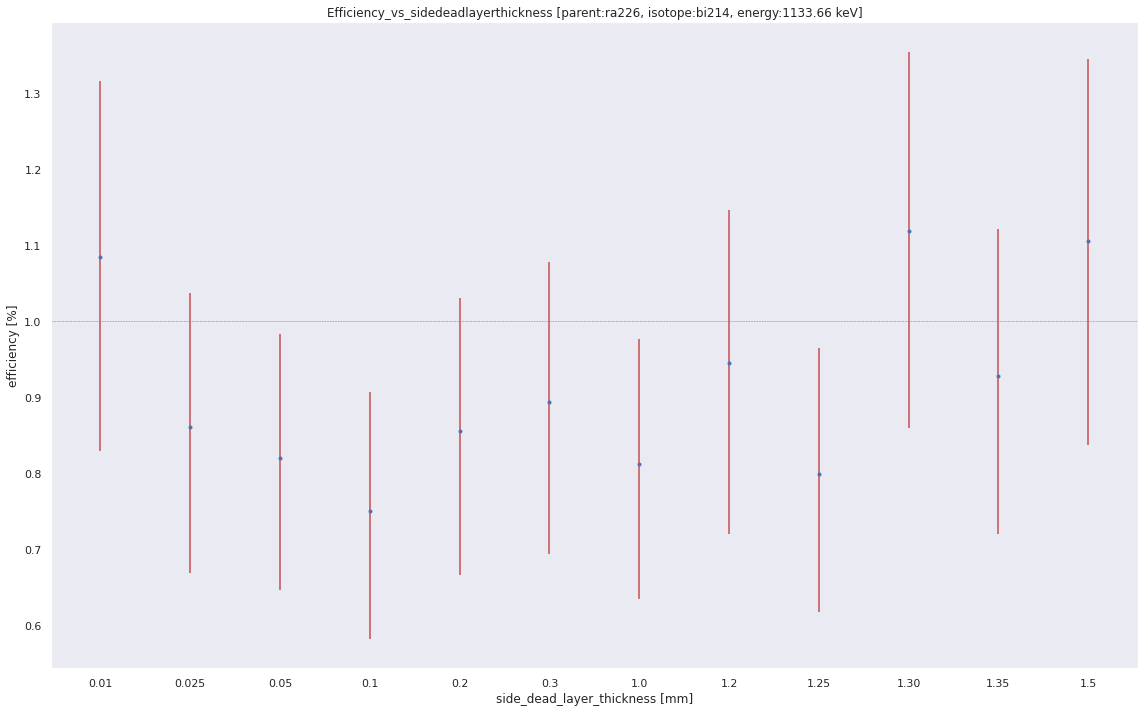


14:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1155.21    0.765134     0.048172    0.047025
1                          0.025  ra226   bi214  1155.21    0.789584     0.048051    0.047164
2                           0.05  ra226   bi214  1155.21    0.773450     0.046911    0.046003
3                            0.1  ra226   bi214  1155.21    0.728016     0.045593    0.044552
4                            0.2  ra226   bi214  1155.21    0.770868     0.047335    0.046410
5                            0.3  ra226   bi214  1155.21    0.811700     0.050366    0.049060
6                            1.0  ra226   bi214  1155.21    0.821076     0.050150    0.049246
7                            1.2  ra226   bi214  1155.21    0.872886     0.056902    0.055207
8                           1.25  ra226   bi214  1155.21    0.900433     0.059506    0.057881
9                           1.30  ra226   bi214  

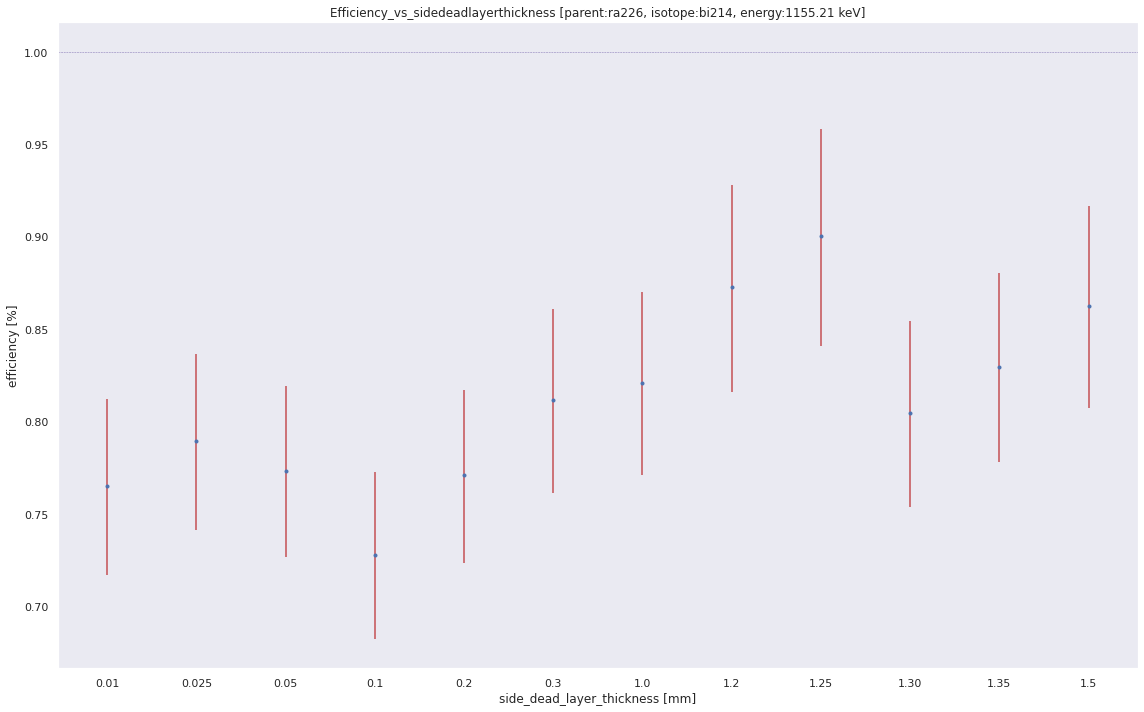


15:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1207.68    0.722682     0.119853    0.114573
1                          0.025  ra226   bi214  1207.68    0.662618     0.108465    0.104021
2                           0.05  ra226   bi214  1207.68    0.780670     0.128662    0.122942
3                            0.1  ra226   bi214  1207.68    0.777748     0.135908    0.127789
4                            0.2  ra226   bi214  1207.68    0.641608     0.106008    0.101522
5                            0.3  ra226   bi214  1207.68    0.717094     0.117433    0.112510
6                            1.0  ra226   bi214  1207.68    0.922221     0.153964    0.146844
7                            1.2  ra226   bi214  1207.68    0.819893     0.143561    0.135062
8                           1.25  ra226   bi214  1207.68    0.878090     0.156992    0.146806
9                           1.30  ra226   bi214  

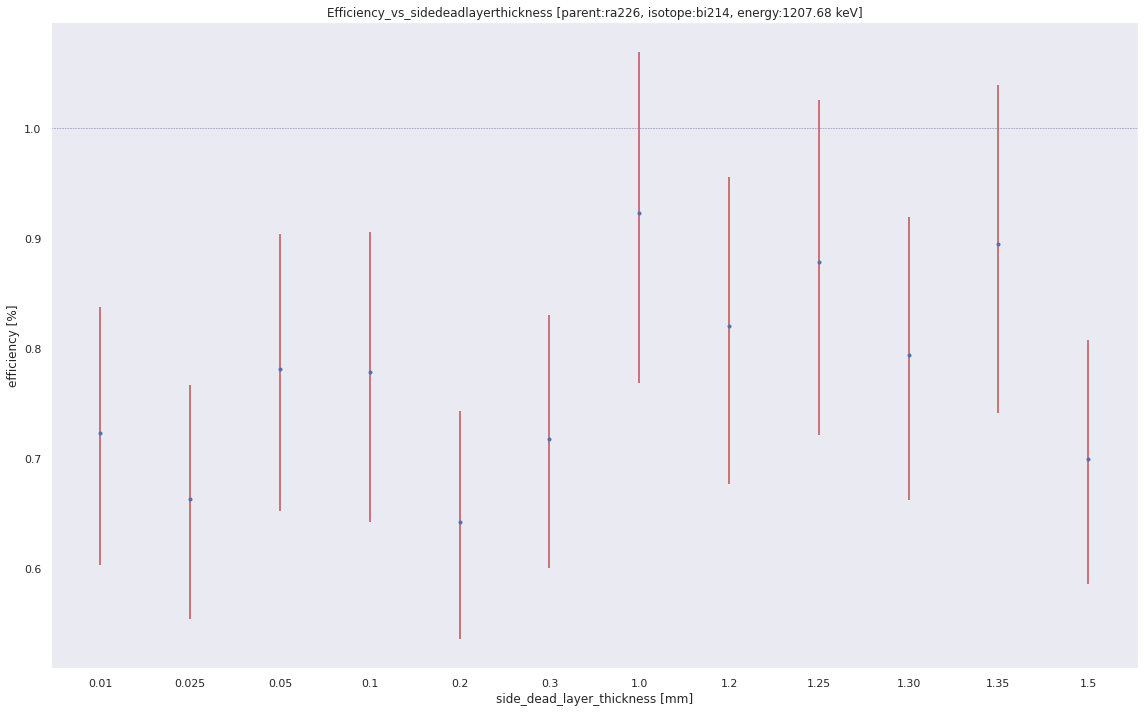


16:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1238.122    0.848207     0.023601    0.023323
1                          0.025  ra226   bi214  1238.122    0.843211     0.023629    0.023336
2                           0.05  ra226   bi214  1238.122    0.853749     0.023889    0.023523
3                            0.1  ra226   bi214  1238.122    0.830166     0.023681    0.023410
4                            0.2  ra226   bi214  1238.122    0.844688     0.023575    0.023274
5                            0.3  ra226   bi214  1238.122    0.842479     0.023121    0.022826
6                            1.0  ra226   bi214  1238.122    0.898473     0.025318    0.025060
7                            1.2  ra226   bi214  1238.122    0.926884     0.027080    0.026667
8                           1.25  ra226   bi214  1238.122    0.923924     0.027043    0.026620
9                           1.30  ra226

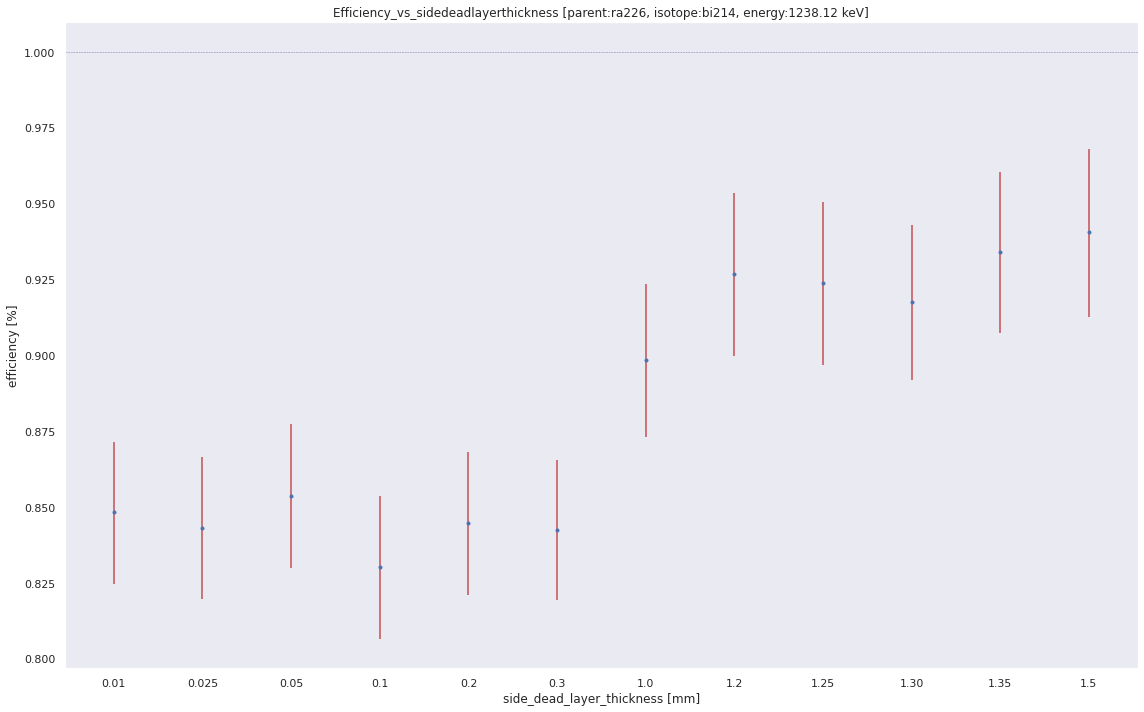


17:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1280.976    0.791101     0.057684    0.056521
1                          0.025  ra226   bi214  1280.976    0.723468     0.051784    0.050655
2                           0.05  ra226   bi214  1280.976    0.756261     0.054777    0.053676
3                            0.1  ra226   bi214  1280.976    0.764373     0.057157    0.055756
4                            0.2  ra226   bi214  1280.976    0.797023     0.056704    0.055376
5                            0.3  ra226   bi214  1280.976    0.763336     0.054712    0.053550
6                            1.0  ra226   bi214  1280.976    0.794535     0.056887    0.055981
7                            1.2  ra226   bi214  1280.976    0.878988     0.067884    0.065947
8                           1.25  ra226   bi214  1280.976    0.851356     0.065052    0.063152
9                           1.30  ra226

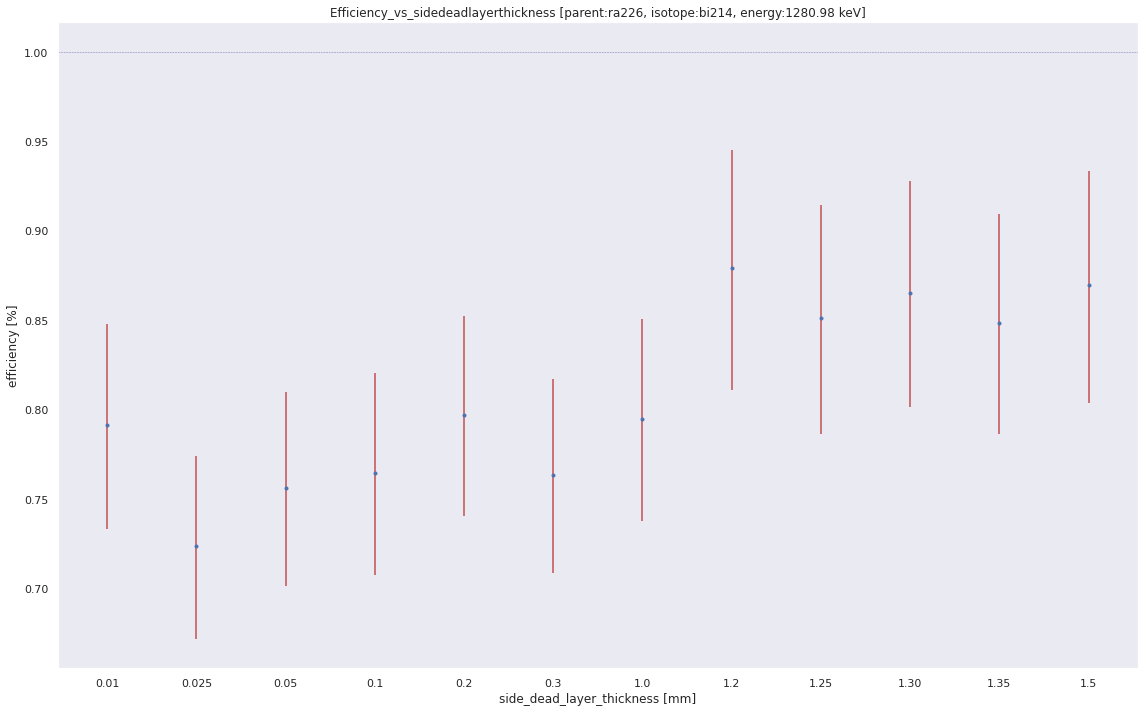


18:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1377.669    0.831613     0.029939    0.029461
1                          0.025  ra226   bi214  1377.669    0.872239     0.031448    0.031091
2                           0.05  ra226   bi214  1377.669    0.849334     0.030532    0.030105
3                            0.1  ra226   bi214  1377.669    0.863031     0.032172    0.031653
4                            0.2  ra226   bi214  1377.669    0.842615     0.030316    0.029865
5                            0.3  ra226   bi214  1377.669    0.840386     0.030301    0.029904
6                            1.0  ra226   bi214  1377.669    0.894069     0.032456    0.032048
7                            1.2  ra226   bi214  1377.669    0.953437     0.036400    0.035706
8                           1.25  ra226   bi214  1377.669    0.913072     0.034456    0.033812
9                           1.30  ra226

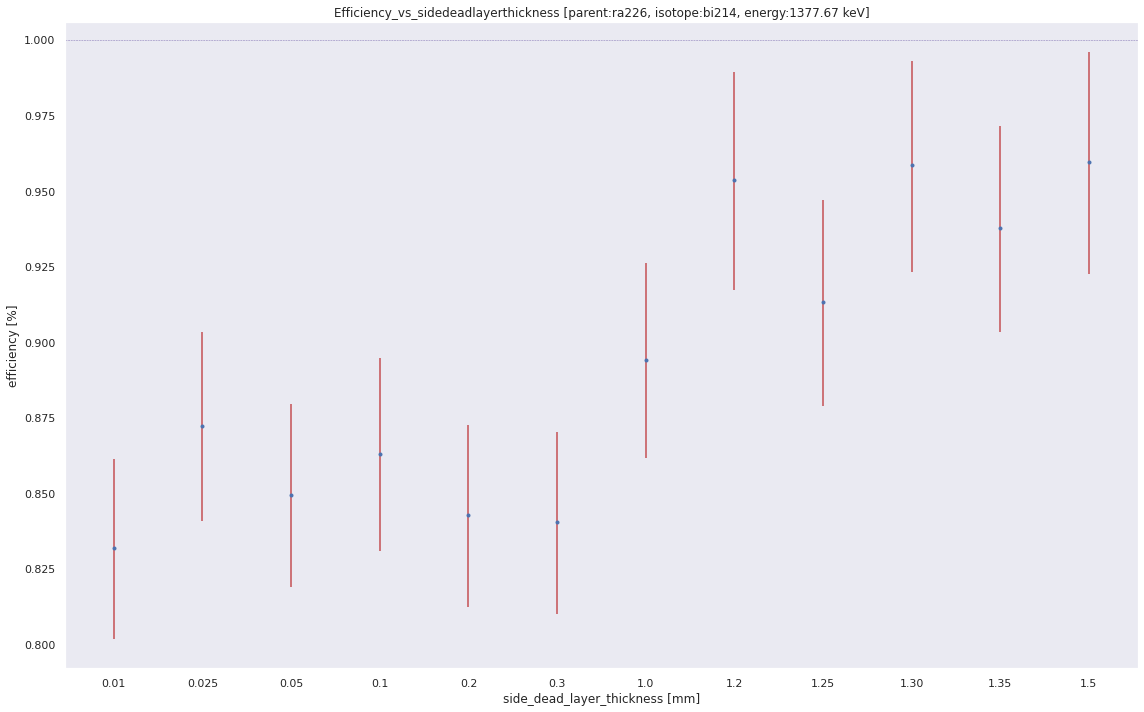


19:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1385.31    0.815573     0.088835    0.086480
1                          0.025  ra226   bi214  1385.31    0.776584     0.083214    0.081063
2                           0.05  ra226   bi214  1385.31    0.776235     0.084006    0.081774
3                            0.1  ra226   bi214  1385.31    0.906072     0.106769    0.101757
4                            0.2  ra226   bi214  1385.31    0.861423     0.094543    0.091618
5                            0.3  ra226   bi214  1385.31    0.822716     0.088373    0.086114
6                            1.0  ra226   bi214  1385.31    0.994387     0.112136    0.108317
7                            1.2  ra226   bi214  1385.31    1.006214     0.121631    0.115884
8                           1.25  ra226   bi214  1385.31    0.943608     0.110264    0.105846
9                           1.30  ra226   bi214  

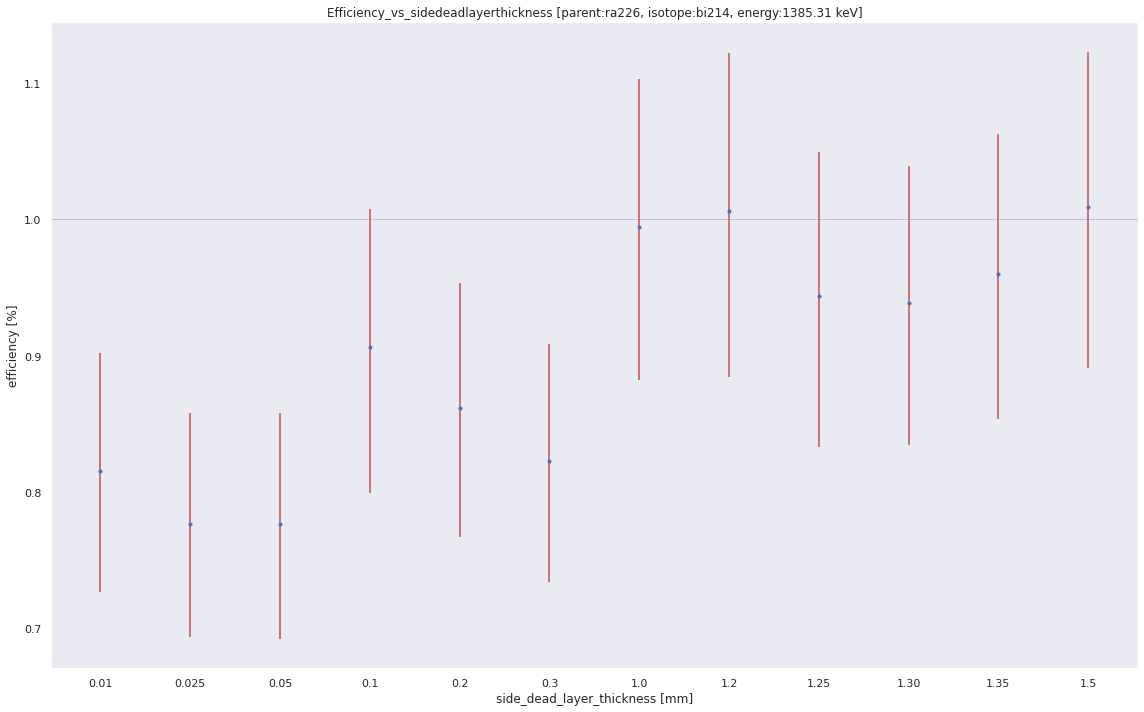


20:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1401.515    0.856629     0.060209    0.058792
1                          0.025  ra226   bi214  1401.515    0.833857     0.057520    0.056322
2                           0.05  ra226   bi214  1401.515    0.843987     0.058102    0.057135
3                            0.1  ra226   bi214  1401.515    0.858874     0.062636    0.060755
4                            0.2  ra226   bi214  1401.515    0.924317     0.065836    0.064032
5                            0.3  ra226   bi214  1401.515    0.883690     0.061614    0.060295
6                            1.0  ra226   bi214  1401.515    0.928467     0.067372    0.065349
7                            1.2  ra226   bi214  1401.515    1.004843     0.076602    0.073756
8                           1.25  ra226   bi214  1401.515    0.891149     0.065857    0.063864
9                           1.30  ra226

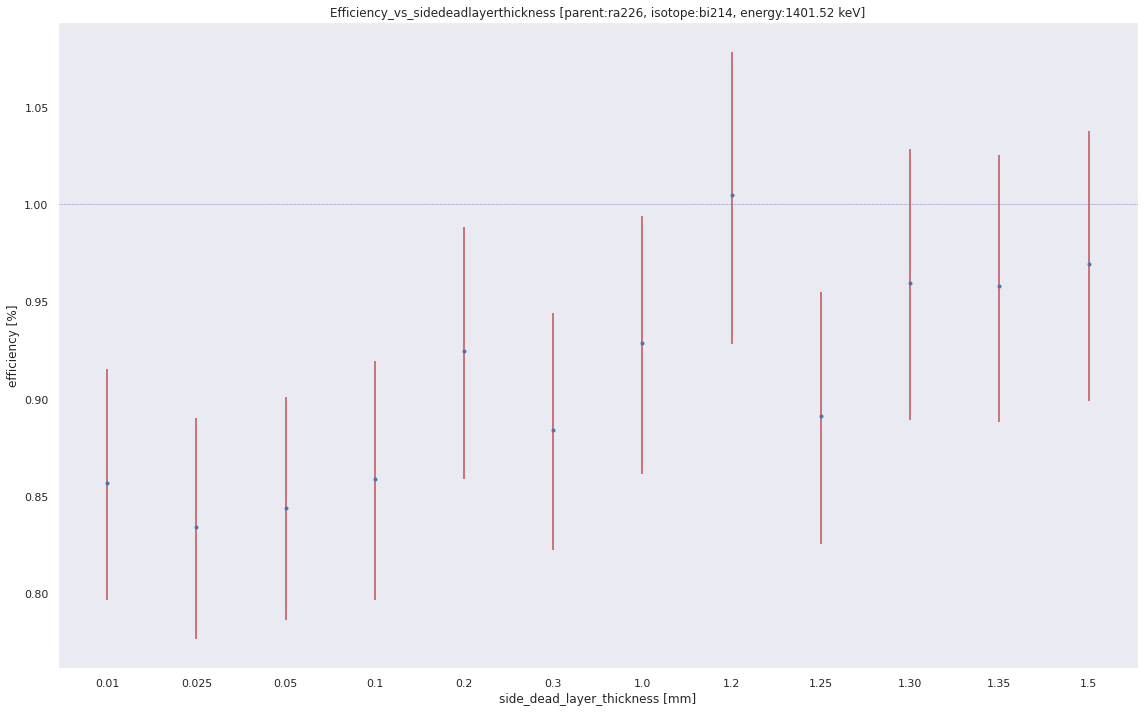


21:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1407.988    0.747341     0.037410    0.036714
1                          0.025  ra226   bi214  1407.988    0.811011     0.040906    0.040212
2                           0.05  ra226   bi214  1407.988    0.779975     0.039108    0.038441
3                            0.1  ra226   bi214  1407.988    0.796896     0.041521    0.040612
4                            0.2  ra226   bi214  1407.988    0.835761     0.041998    0.041404
5                            0.3  ra226   bi214  1407.988    0.813940     0.040610    0.039934
6                            1.0  ra226   bi214  1407.988    0.841577     0.043657    0.042899
7                            1.2  ra226   bi214  1407.988    0.832762     0.043723    0.042821
8                           1.25  ra226   bi214  1407.988    0.851221     0.044951    0.043998
9                           1.30  ra226

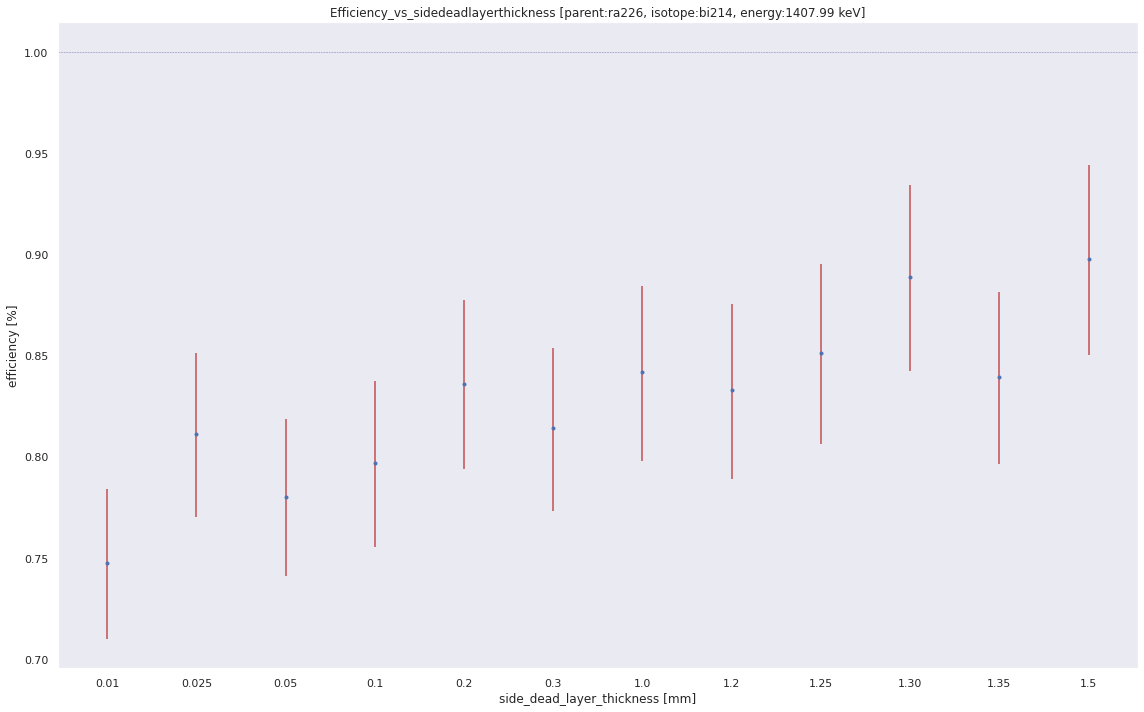


22:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1509.21    0.933745     0.052915    0.051996
1                          0.025  ra226   bi214  1509.21    0.869864     0.049400    0.048492
2                           0.05  ra226   bi214  1509.21    0.847419     0.047242    0.046239
3                            0.1  ra226   bi214  1509.21    0.884838     0.052145    0.051183
4                            0.2  ra226   bi214  1509.21    0.858072     0.048388    0.047310
5                            0.3  ra226   bi214  1509.21    0.946621     0.053989    0.052898
6                            1.0  ra226   bi214  1509.21    0.922995     0.052868    0.051694
7                            1.2  ra226   bi214  1509.21    0.994242     0.060265    0.058912
8                           1.25  ra226   bi214  1509.21    0.986735     0.059689    0.058206
9                           1.30  ra226   bi214  

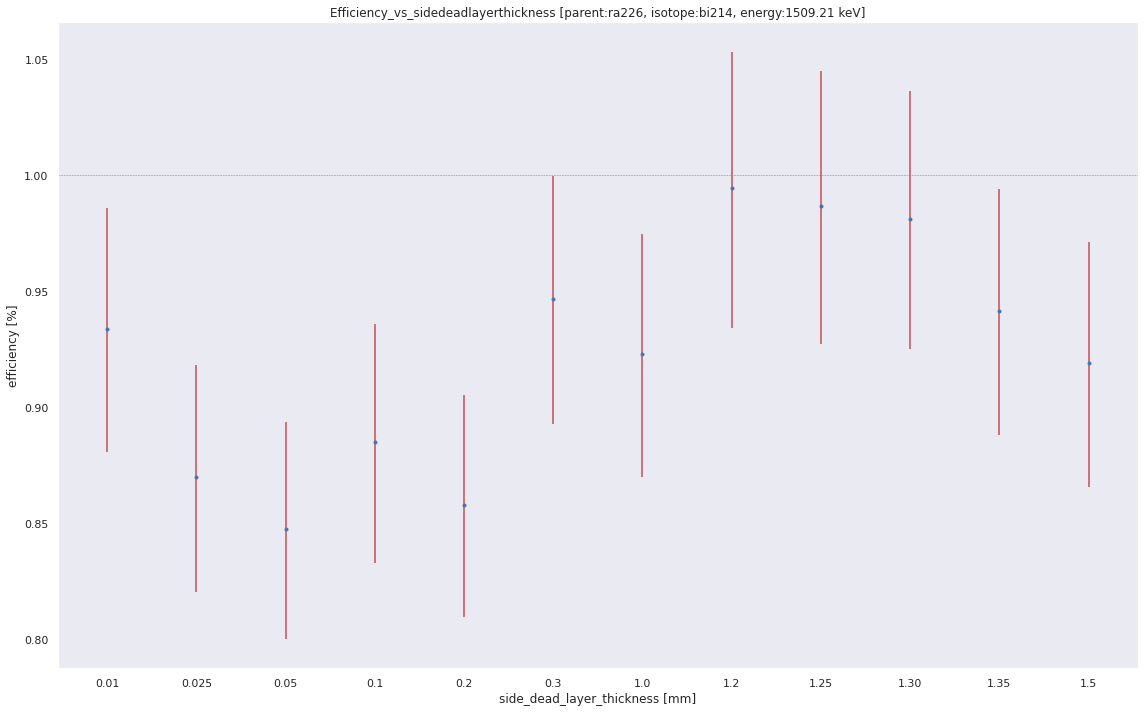


23:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1538.53    0.900553     0.172535    0.162217
1                          0.025  ra226   bi214  1538.53    0.782065     0.142137    0.135104
2                           0.05  ra226   bi214  1538.53    0.870650     0.161419    0.153346
3                            0.1  ra226   bi214  1538.53    0.814308     0.156795    0.147105
4                            0.2  ra226   bi214  1538.53    0.775347     0.140154    0.134437
5                            0.3  ra226   bi214  1538.53    0.835925     0.153285    0.146163
6                            1.0  ra226   bi214  1538.53    0.916687     0.173363    0.162465
7                            1.2  ra226   bi214  1538.53    1.009944     0.203581    0.187776
8                           1.25  ra226   bi214  1538.53    0.779735     0.148385    0.139443
9                           1.30  ra226   bi214  

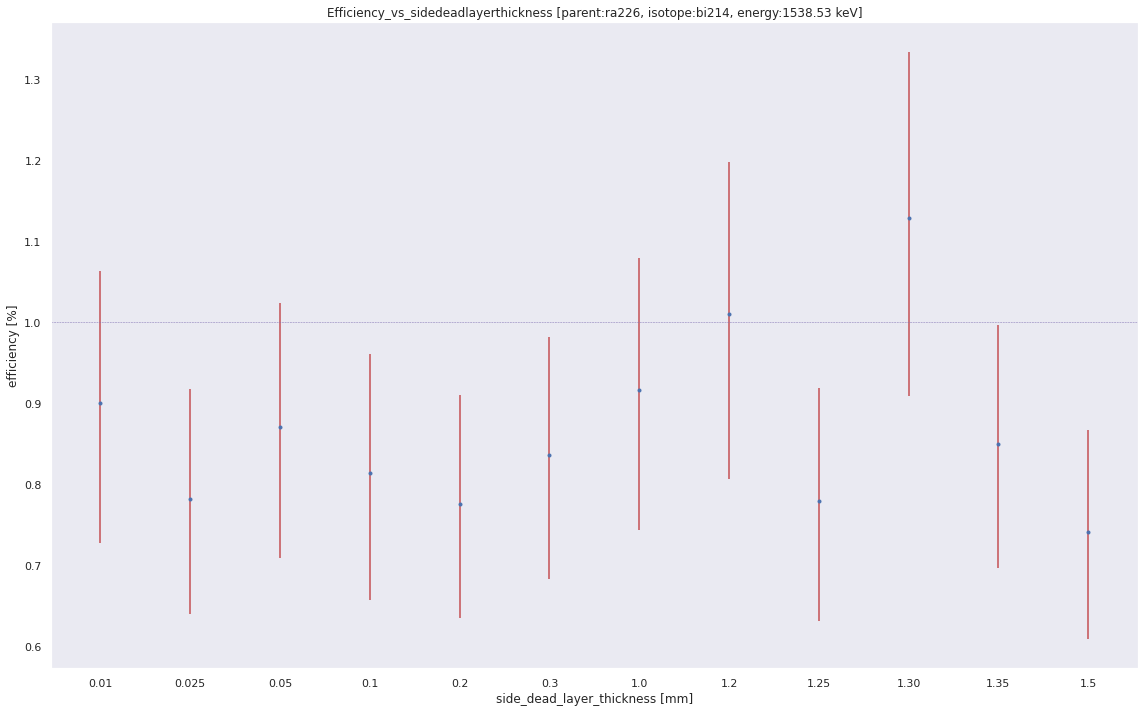


24:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1543.34    1.133511     0.212561    0.195506
1                          0.025  ra226   bi214  1543.34    0.999098     0.175309    0.164231
2                           0.05  ra226   bi214  1543.34    1.427266     0.284023    0.255034
3                            0.1  ra226   bi214  1543.34    1.155959     0.228546    0.206467
4                            0.2  ra226   bi214  1543.34    1.254193     0.238173    0.217676
5                            0.3  ra226   bi214  1543.34    0.962396     0.167019    0.157653
6                            1.0  ra226   bi214  1543.34    1.613487     0.352924    0.307813
7                            1.2  ra226   bi214  1543.34    1.328607     0.273924    0.244566
8                           1.25  ra226   bi214  1543.34    1.417805     0.305783    0.267699
9                           1.30  ra226   bi214  

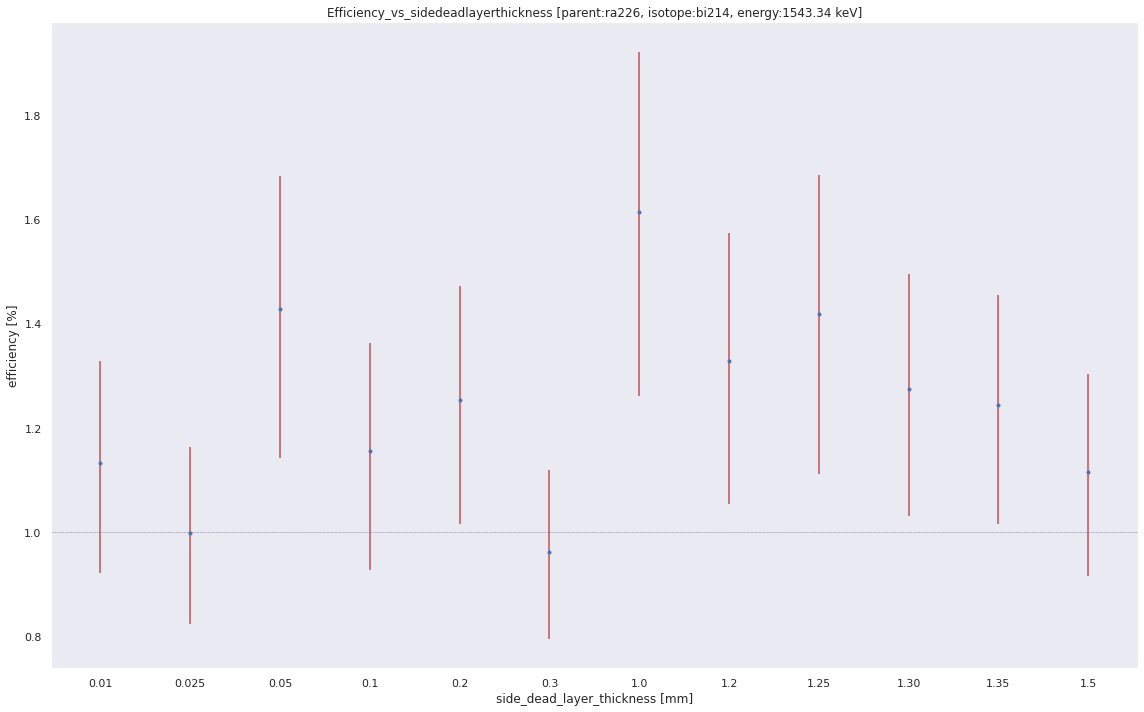


25:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1583.204    0.795309     0.099555    0.096269
1                          0.025  ra226   bi214  1583.204    0.704043     0.086315    0.083791
2                           0.05  ra226   bi214  1583.204    0.842616     0.107613    0.103695
3                            0.1  ra226   bi214  1583.204    0.765833     0.100874    0.096489
4                            0.2  ra226   bi214  1583.204    0.879101     0.112009    0.108202
5                            0.3  ra226   bi214  1583.204    0.774903     0.096662    0.093646
6                            1.0  ra226   bi214  1583.204    0.808378     0.100359    0.097160
7                            1.2  ra226   bi214  1583.204    0.887632     0.120413    0.114853
8                           1.25  ra226   bi214  1583.204    0.814929     0.108281    0.103202
9                           1.30  ra226

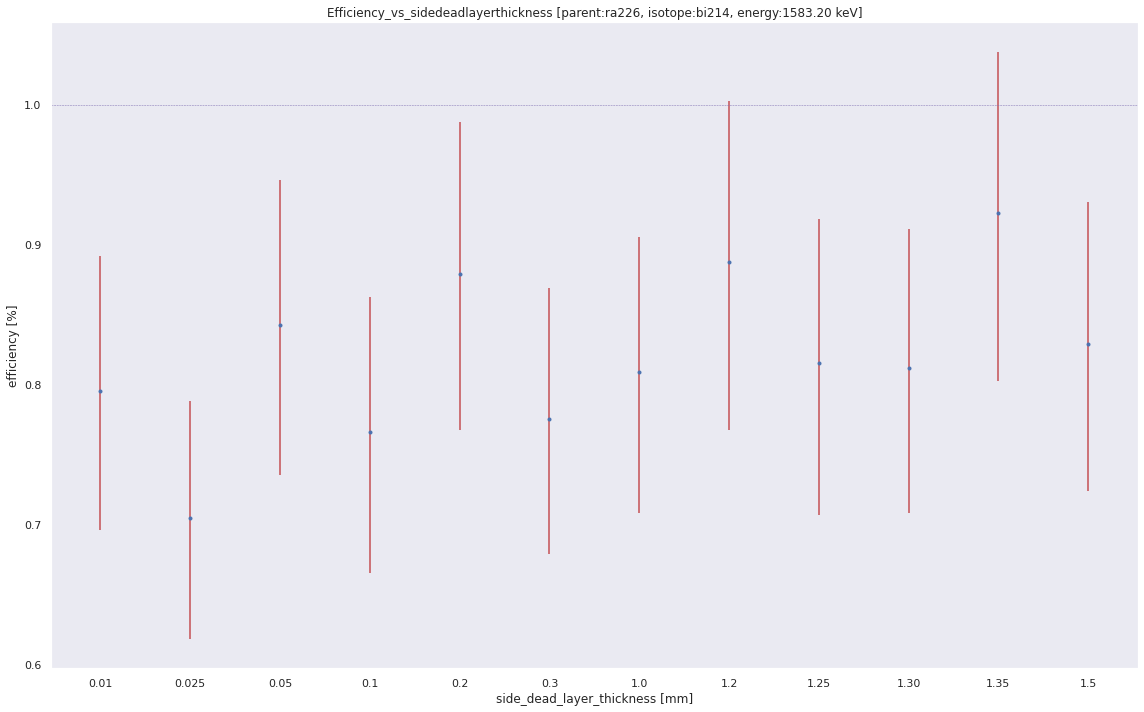


26:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1594.75    0.497047     0.160627    0.152517
1                          0.025  ra226   bi214  1594.75    0.463377     0.147259    0.141026
2                           0.05  ra226   bi214  1594.75    0.463757     0.148272    0.140870
3                            0.1  ra226   bi214  1594.75    0.648602     0.227756    0.205215
4                            0.2  ra226   bi214  1594.75    0.656407     0.220217    0.204400
5                            0.3  ra226   bi214  1594.75    0.730481     0.252921    0.230038
6                            1.0  ra226   bi214  1594.75    0.535076     0.175628    0.165277
7                            1.2  ra226   bi214  1594.75    0.556644     0.184376    0.172158
8                           1.25  ra226   bi214  1594.75    0.722896     0.259903    0.232627
9                           1.30  ra226   bi214  

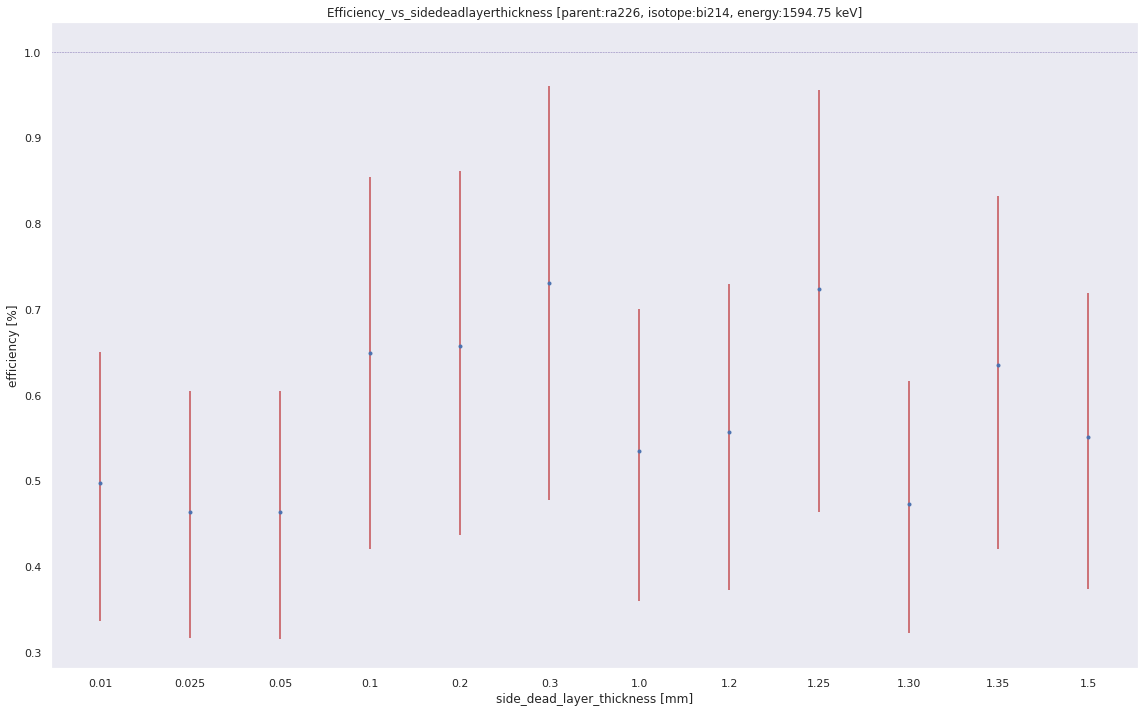


27:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1661.274    0.817684     0.069938    0.068155
1                          0.025  ra226   bi214  1661.274    0.795451     0.067212    0.065736
2                           0.05  ra226   bi214  1661.274    0.708603     0.058384    0.057091
3                            0.1  ra226   bi214  1661.274    0.864871     0.078169    0.075286
4                            0.2  ra226   bi214  1661.274    0.770010     0.063709    0.062078
5                            0.3  ra226   bi214  1661.274    0.778955     0.063934    0.062472
6                            1.0  ra226   bi214  1661.274    0.836933     0.072538    0.070277
7                            1.2  ra226   bi214  1661.274    0.976672     0.091483    0.087329
8                           1.25  ra226   bi214  1661.274    0.942112     0.086594    0.083250
9                           1.30  ra226

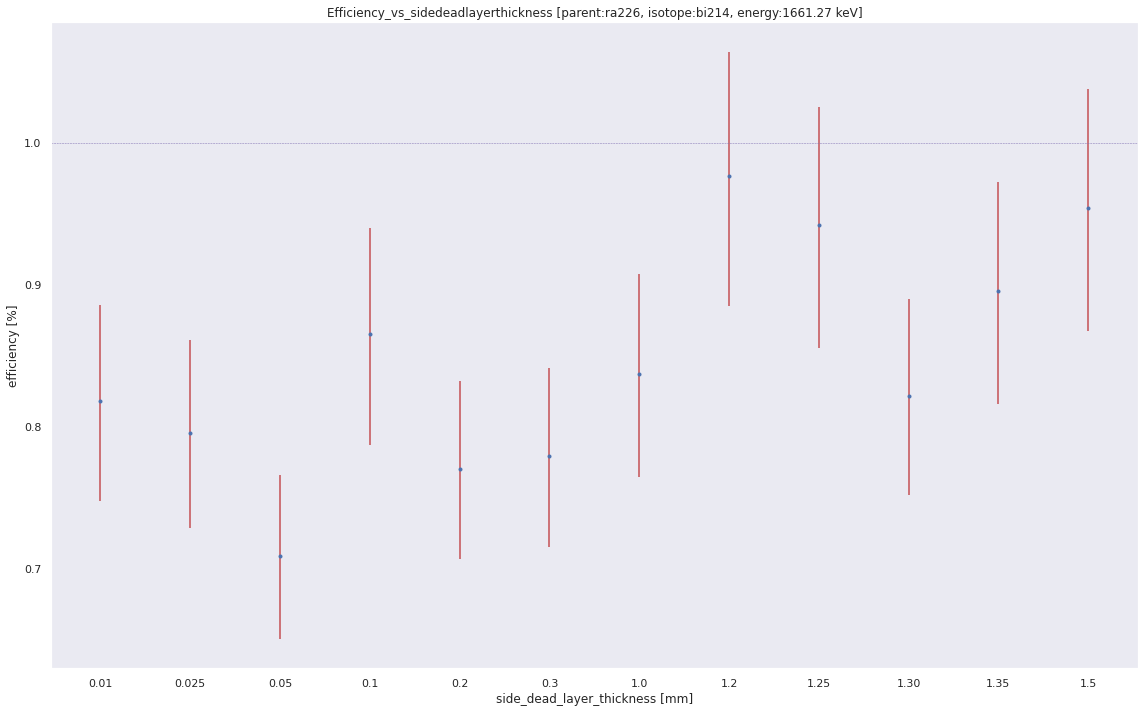


28:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1684.012    0.842407     0.206228    0.194617
1                          0.025  ra226   bi214  1684.012    0.885760     0.218921    0.205218
2                           0.05  ra226   bi214  1684.012    1.025732     0.278914    0.250842
3                            0.1  ra226   bi214  1684.012    0.855059     0.220916    0.204335
4                            0.2  ra226   bi214  1684.012    0.737019     0.180023    0.171053
5                            0.3  ra226   bi214  1684.012    0.952827     0.249252    0.227867
6                            1.0  ra226   bi214  1684.012    1.252432     0.357557    0.312657
7                            1.2  ra226   bi214  1684.012    1.363677     0.378883    0.465779
8                           1.25  ra226   bi214  1684.012    1.027395     0.281948    0.253584
9                           1.30  ra226

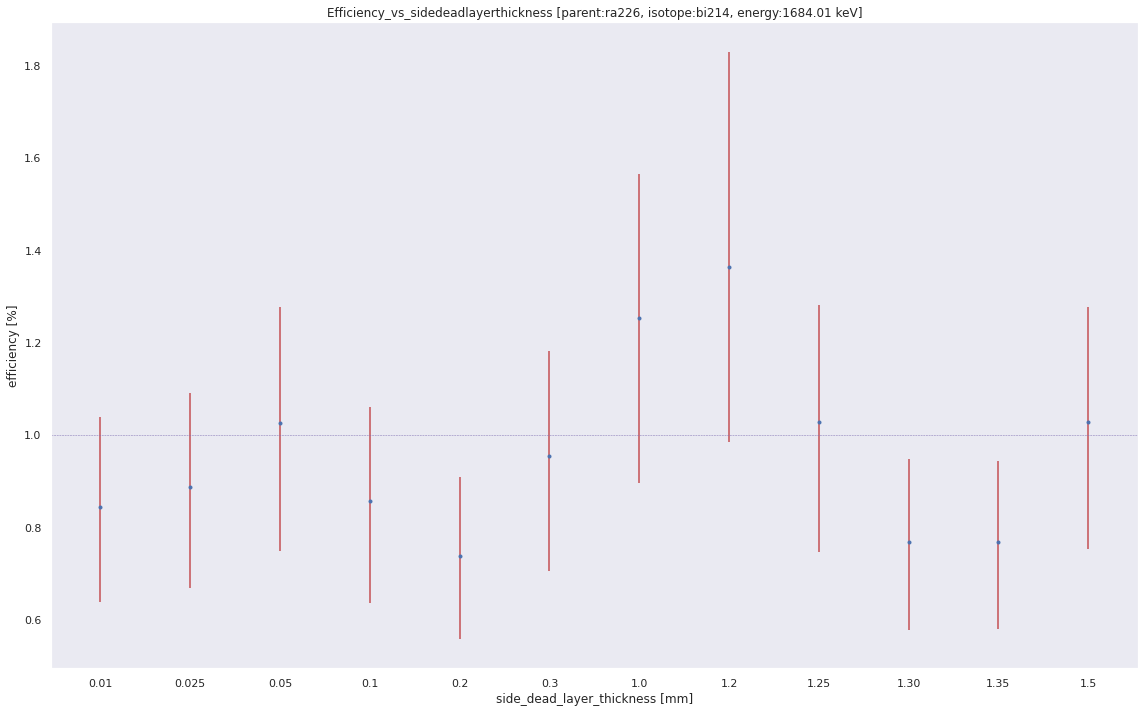


29:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1729.595    0.732935     0.032967    0.032524
1                          0.025  ra226   bi214  1729.595    0.734932     0.032853    0.032311
2                           0.05  ra226   bi214  1729.595    0.764695     0.034286    0.033869
3                            0.1  ra226   bi214  1729.595    0.741073     0.034333    0.033464
4                            0.2  ra226   bi214  1729.595    0.799531     0.036240    0.035651
5                            0.3  ra226   bi214  1729.595    0.770830     0.034122    0.033612
6                            1.0  ra226   bi214  1729.595    0.846275     0.038935    0.038297
7                            1.2  ra226   bi214  1729.595    0.778057     0.035974    0.035435
8                           1.25  ra226   bi214  1729.595    0.835062     0.039629    0.038885
9                           1.30  ra226

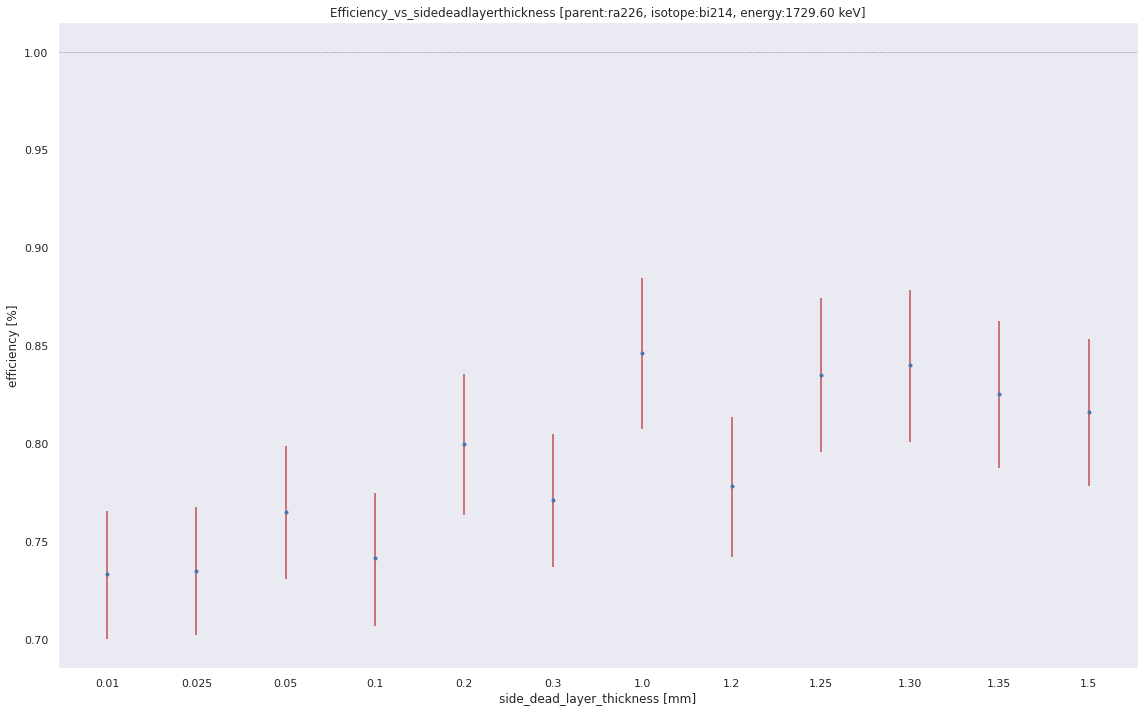


30:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1764.491    0.828869     0.015767    0.015659
1                          0.025  ra226   bi214  1764.491    0.834424     0.015817    0.015686
2                           0.05  ra226   bi214  1764.491    0.808494     0.015226    0.015078
3                            0.1  ra226   bi214  1764.491    0.813467     0.015661    0.015487
4                            0.2  ra226   bi214  1764.491    0.820352     0.015457    0.015341
5                            0.3  ra226   bi214  1764.491    0.839577     0.015740    0.015644
6                            1.0  ra226   bi214  1764.491    0.872366     0.016603    0.016465
7                            1.2  ra226   bi214  1764.491    0.904572     0.017730    0.017535
8                           1.25  ra226   bi214  1764.491    0.913712     0.017814    0.017589
9                           1.30  ra226

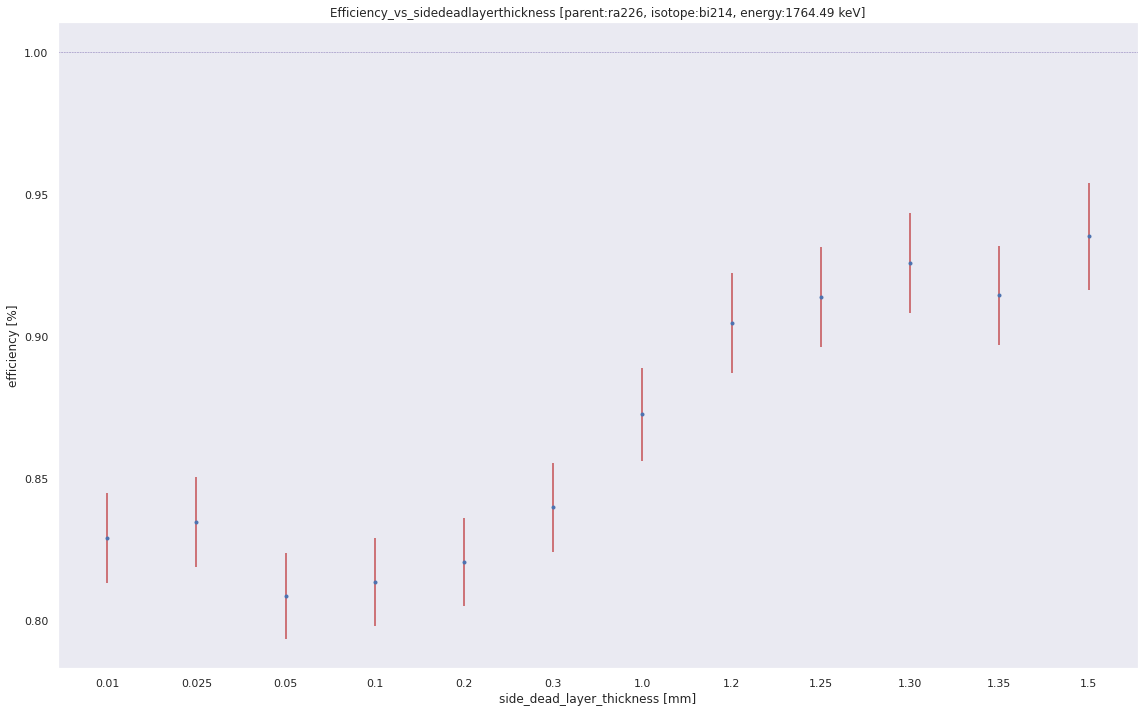


31:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1838.36    0.784850     0.160264    0.150852
1                          0.025  ra226   bi214  1838.36    0.777418     0.158563    0.148854
2                           0.05  ra226   bi214  1838.36    0.717263     0.145057    0.136427
3                            0.1  ra226   bi214  1838.36    0.746417     0.152554    0.143079
4                            0.2  ra226   bi214  1838.36    0.731523     0.143408    0.136945
5                            0.3  ra226   bi214  1838.36    0.682076     0.134928    0.128455
6                            1.0  ra226   bi214  1838.36    0.693192     0.136300    0.129684
7                            1.2  ra226   bi214  1838.36    0.623000     0.121416    0.116039
8                           1.25  ra226   bi214  1838.36    0.696218     0.138979    0.132227
9                           1.30  ra226   bi214  

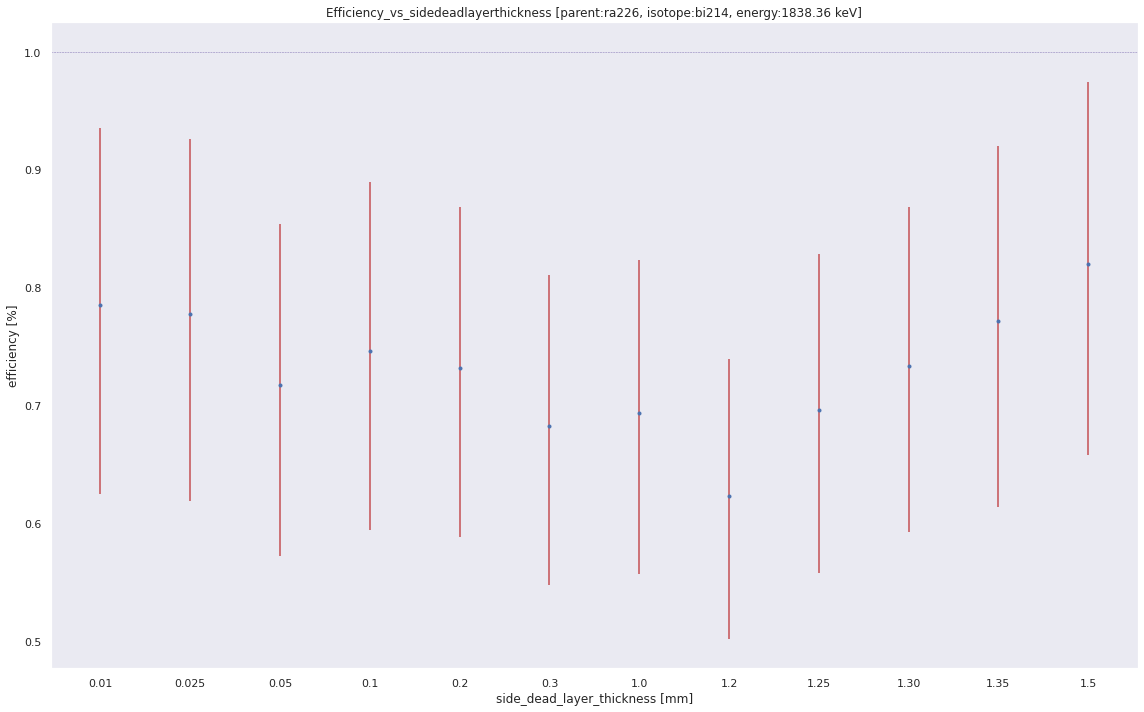


32:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1847.429    0.851232     0.048800    0.047803
1                          0.025  ra226   bi214  1847.429    0.852669     0.048133    0.047133
2                           0.05  ra226   bi214  1847.429    0.849126     0.048022    0.047159
3                            0.1  ra226   bi214  1847.429    0.857139     0.049553    0.048497
4                            0.2  ra226   bi214  1847.429    0.840428     0.047190    0.046409
5                            0.3  ra226   bi214  1847.429    0.940371     0.053325    0.052236
6                            1.0  ra226   bi214  1847.429    0.916486     0.053112    0.052004
7                            1.2  ra226   bi214  1847.429    1.019942     0.060696    0.059524
8                           1.25  ra226   bi214  1847.429    0.938598     0.054471    0.053363
9                           1.30  ra226

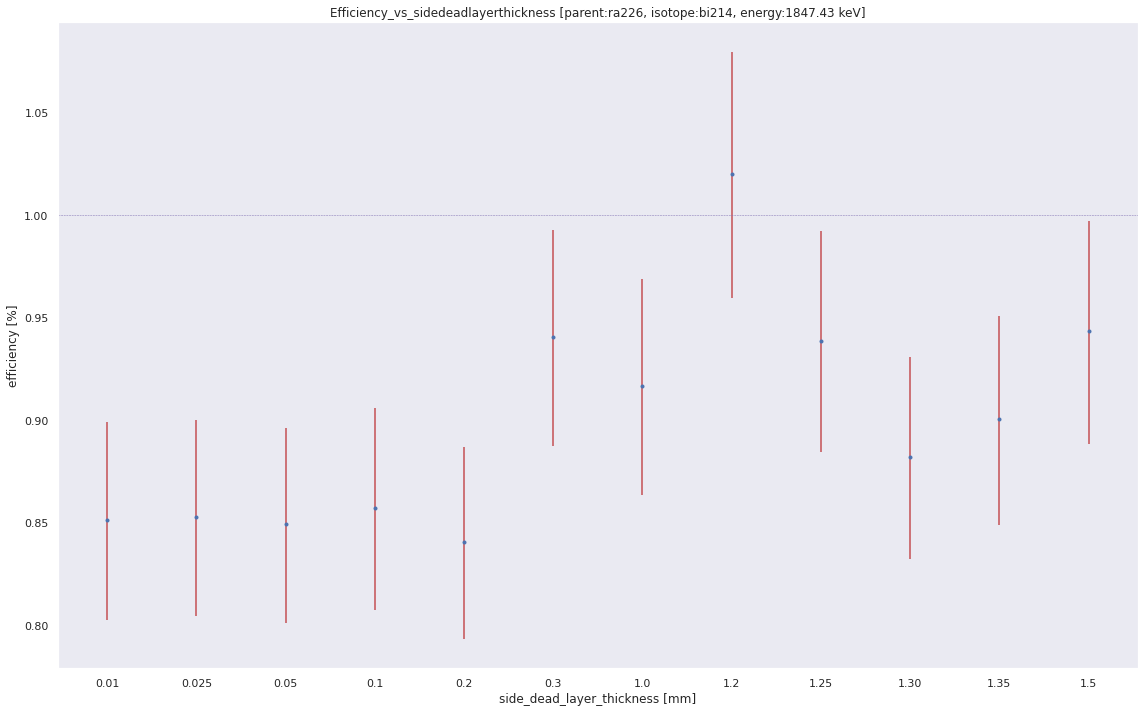


33:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  1873.16    0.635212     0.155441    0.144883
1                          0.025  ra226   bi214  1873.16    0.645381     0.162647    0.149226
2                           0.05  ra226   bi214  1873.16    0.579695     0.140604    0.131442
3                            0.1  ra226   bi214  1873.16    0.586290     0.147774    0.135416
4                            0.2  ra226   bi214  1873.16    0.586027     0.142299    0.132651
5                            0.3  ra226   bi214  1873.16    0.573311     0.138338    0.129495
6                            1.0  ra226   bi214  1873.16    0.746936     0.201613    0.178434
7                            1.2  ra226   bi214  1873.16    0.722282     0.190984    0.171320
8                           1.25  ra226   bi214  1873.16    0.859814     0.247568    0.212864
9                           1.30  ra226   bi214  

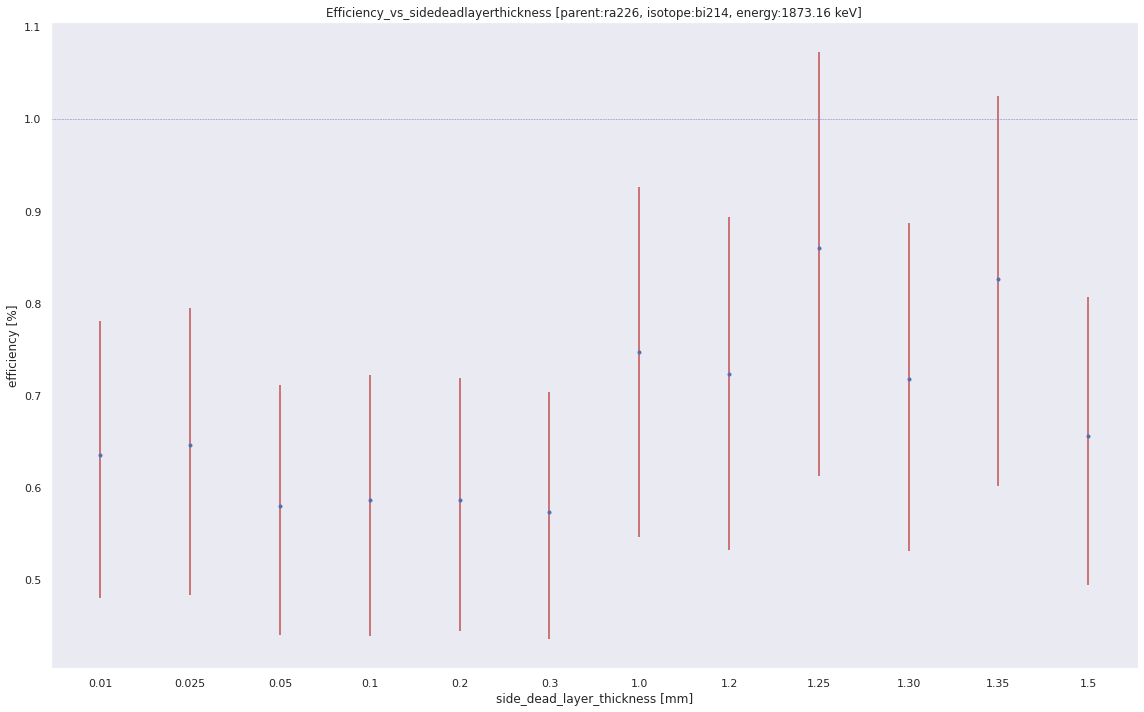


34:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  2118.514    0.730014     0.055984    0.054519
1                          0.025  ra226   bi214  2118.514    0.679712     0.051238    0.050102
2                           0.05  ra226   bi214  2118.514    0.764169     0.058833    0.057150
3                            0.1  ra226   bi214  2118.514    0.683029     0.053132    0.051694
4                            0.2  ra226   bi214  2118.514    0.767140     0.059909    0.058091
5                            0.3  ra226   bi214  2118.514    0.718703     0.054399    0.053173
6                            1.0  ra226   bi214  2118.514    0.787481     0.060154    0.059001
7                            1.2  ra226   bi214  2118.514    0.832703     0.067056    0.064965
8                           1.25  ra226   bi214  2118.514    0.794423     0.063535    0.061746
9                           1.30  ra226

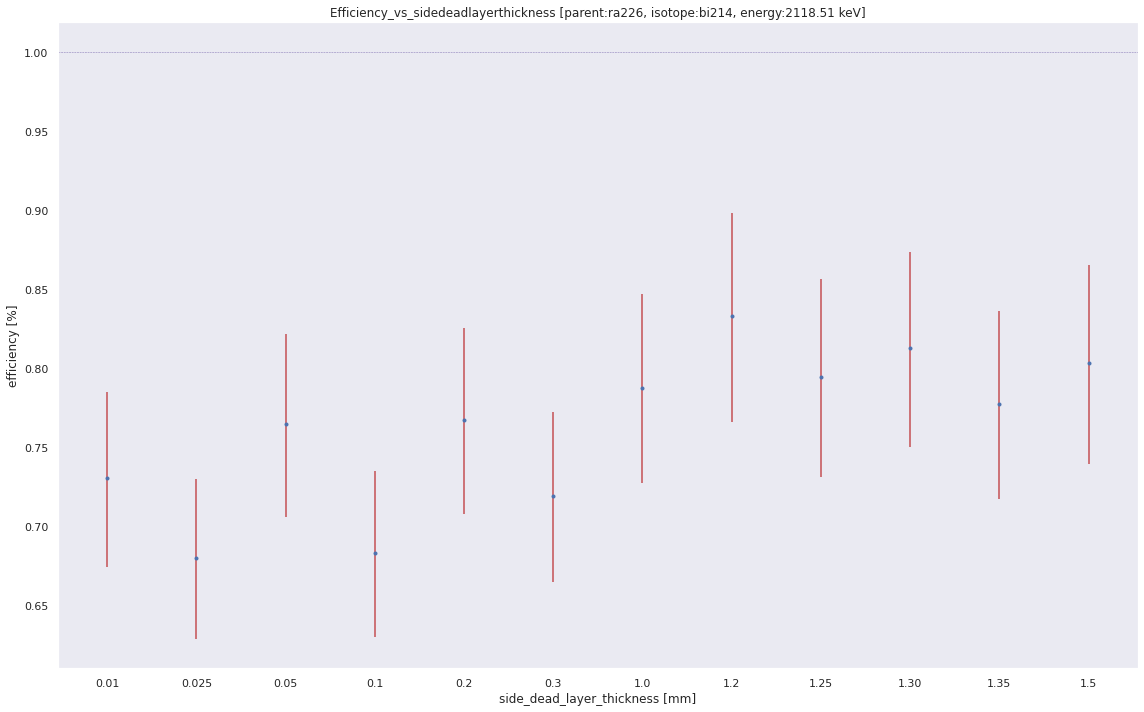


35:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  2204.059    0.818853     0.029961    0.029574
1                          0.025  ra226   bi214  2204.059    0.794762     0.028788    0.028424
2                           0.05  ra226   bi214  2204.059    0.827457     0.030144    0.029687
3                            0.1  ra226   bi214  2204.059    0.816217     0.030673    0.030194
4                            0.2  ra226   bi214  2204.059    0.817991     0.029899    0.029520
5                            0.3  ra226   bi214  2204.059    0.835703     0.030459    0.030018
6                            1.0  ra226   bi214  2204.059    0.868284     0.032129    0.031573
7                            1.2  ra226   bi214  2204.059    0.870331     0.032197    0.031764
8                           1.25  ra226   bi214  2204.059    0.892382     0.033920    0.033451
9                           1.30  ra226

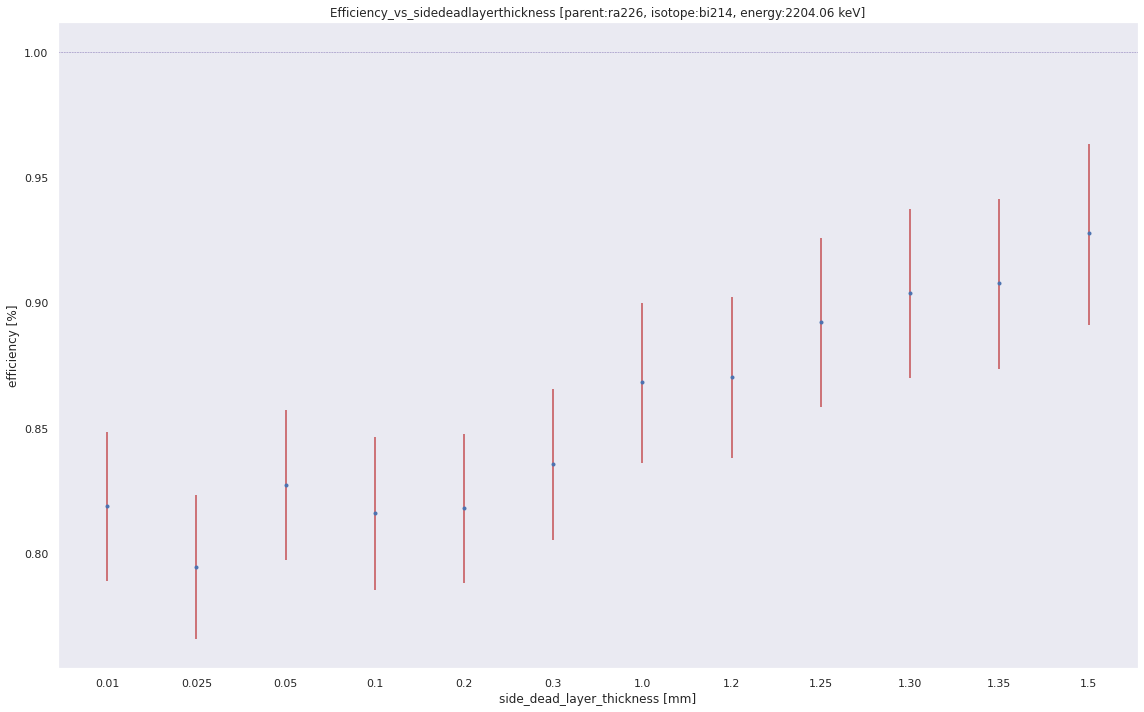


36:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  2293.38    0.818831     0.139314    0.131781
1                          0.025  ra226   bi214  2293.38    0.789042     0.129606    0.123186
2                           0.05  ra226   bi214  2293.38    0.809195     0.133951    0.128008
3                            0.1  ra226   bi214  2293.38    0.776904     0.131571    0.124453
4                            0.2  ra226   bi214  2293.38    0.765917     0.125234    0.119774
5                            0.3  ra226   bi214  2293.38    0.801181     0.131618    0.125937
6                            1.0  ra226   bi214  2293.38    0.853389     0.144284    0.136963
7                            1.2  ra226   bi214  2293.38    0.826702     0.142553    0.134865
8                           1.25  ra226   bi214  2293.38    0.856425     0.150290    0.141062
9                           1.30  ra226   bi214  

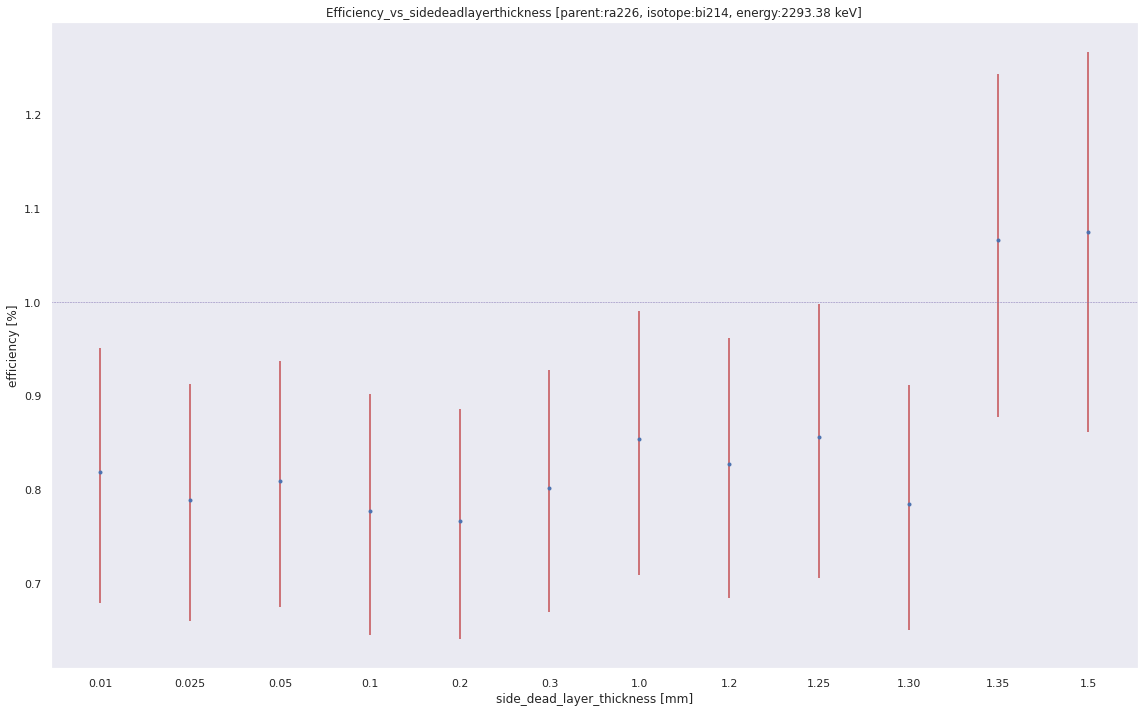


37:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   bi214  2447.7    0.719663     0.049462    0.048489
1                          0.025  ra226   bi214  2447.7    0.762451     0.052689    0.051407
2                           0.05  ra226   bi214  2447.7    0.730905     0.050167    0.049064
3                            0.1  ra226   bi214  2447.7    0.770932     0.054875    0.053490
4                            0.2  ra226   bi214  2447.7    0.796194     0.055818    0.054314
5                            0.3  ra226   bi214  2447.7    0.791357     0.052586    0.051755
6                            1.0  ra226   bi214  2447.7    0.855759     0.060554    0.059232
7                            1.2  ra226   bi214  2447.7    0.800985     0.055859    0.054780
8                           1.25  ra226   bi214  2447.7    0.825750     0.059810    0.058038
9                           1.30  ra226   bi214  2447.7    

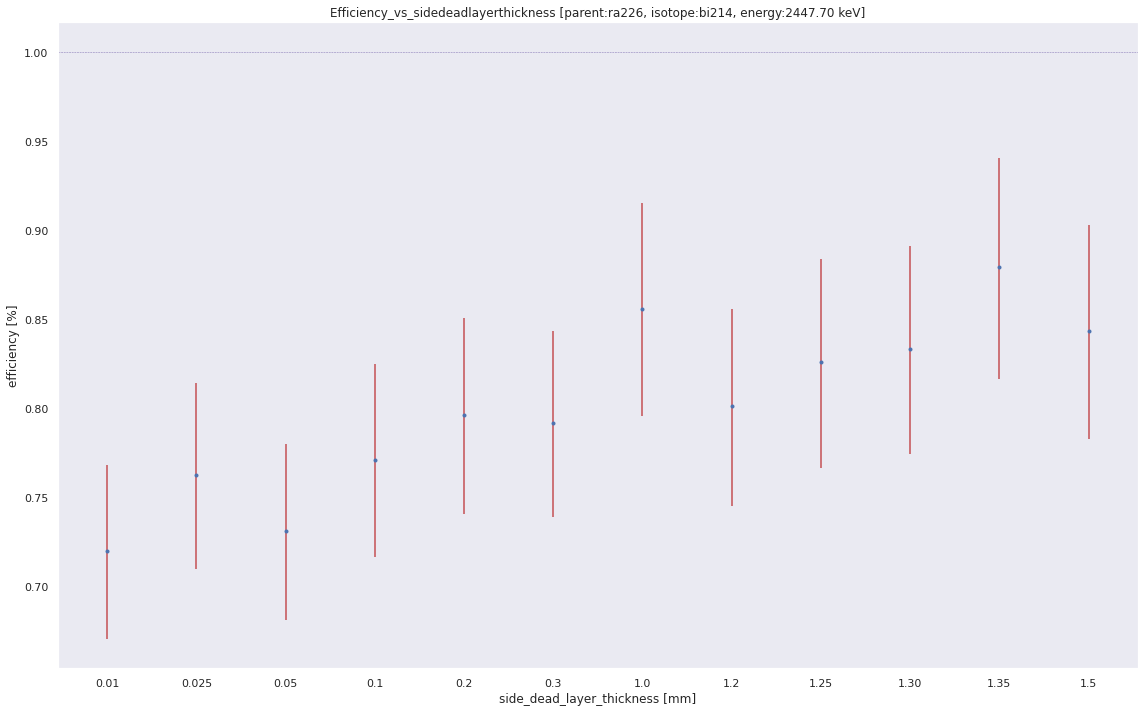


38:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  241.995    0.778309     0.016770    0.016644
1                          0.025  ra226   pb214  241.995    0.771763     0.016477    0.016372
2                           0.05  ra226   pb214  241.995    0.783990     0.016737    0.016604
3                            0.1  ra226   pb214  241.995    0.792926     0.017677    0.017438
4                            0.2  ra226   pb214  241.995    0.787036     0.016749    0.016651
5                            0.3  ra226   pb214  241.995    0.797354     0.017163    0.017088
6                            1.0  ra226   pb214  241.995    0.864430     0.018860    0.018739
7                            1.2  ra226   pb214  241.995    0.905939     0.020770    0.020572
8                           1.25  ra226   pb214  241.995    0.912634     0.020914    0.020643
9                           1.30  ra226   pb214  

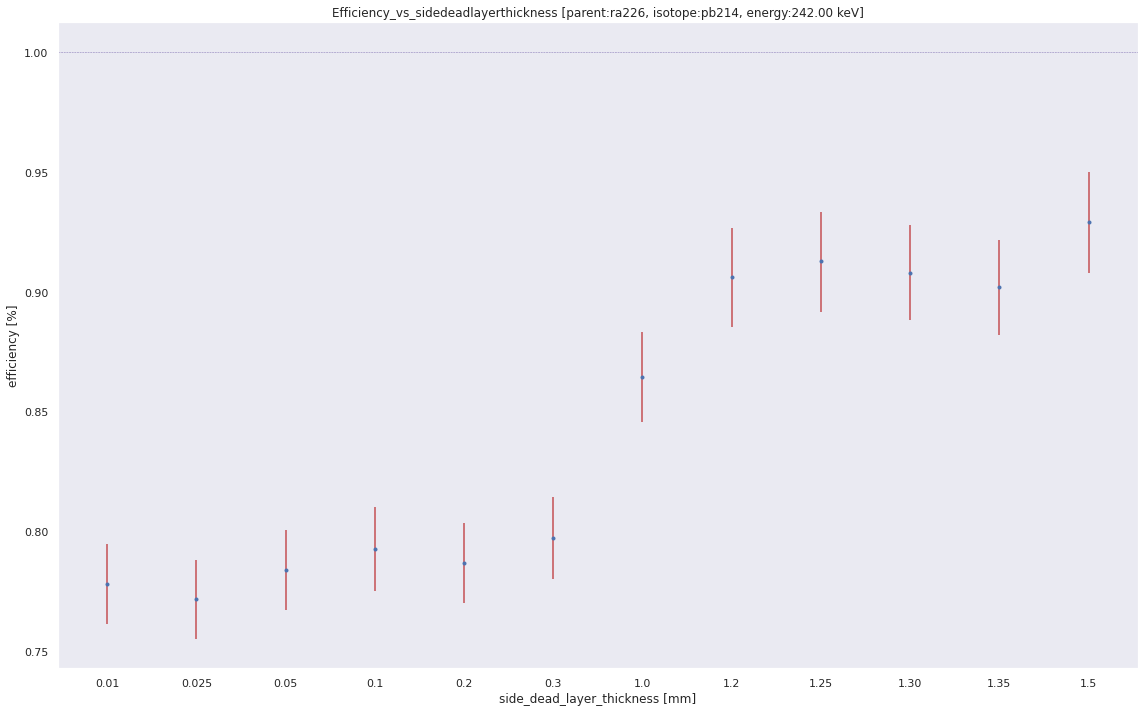


39:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  258.86    0.590424     0.135535    0.130442
1                          0.025  ra226   pb214  258.86    0.645337     0.151213    0.144141
2                           0.05  ra226   pb214  258.86    0.629509     0.145411    0.138964
3                            0.1  ra226   pb214  258.86    0.776482     0.200478    0.182312
4                            0.2  ra226   pb214  258.86    0.593349     0.136457    0.131704
5                            0.3  ra226   pb214  258.86    0.637366     0.147965    0.141543
6                            1.0  ra226   pb214  258.86    0.669941     0.156594    0.149264
7                            1.2  ra226   pb214  258.86    0.709178     0.176136    0.164033
8                           1.25  ra226   pb214  258.86    0.805568     0.209350    0.190976
9                           1.30  ra226   pb214  258.86    

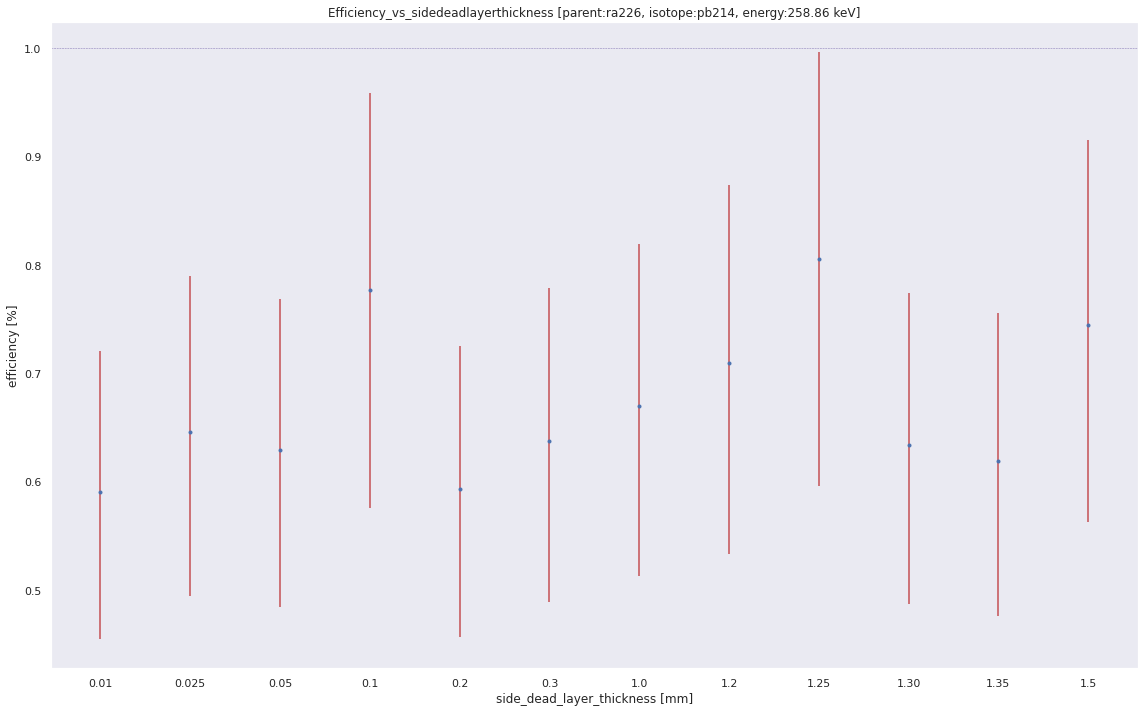


40:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214   274.8    1.154155     0.217507    0.199635
1                          0.025  ra226   pb214   274.8    1.047555     0.190114    0.176979
2                           0.05  ra226   pb214   274.8    0.935356     0.163638    0.153246
3                            0.1  ra226   pb214   274.8    1.242398     0.266351    0.233614
4                            0.2  ra226   pb214   274.8    1.000181     0.177101    0.165640
5                            0.3  ra226   pb214   274.8    1.118811     0.205977    0.190293
6                            1.0  ra226   pb214   274.8    0.971906     0.170164    0.159171
7                            1.2  ra226   pb214   274.8    0.995462     0.189345    0.174071
8                           1.25  ra226   pb214   274.8    1.288771     0.277960    0.243387
9                           1.30  ra226   pb214   274.8    

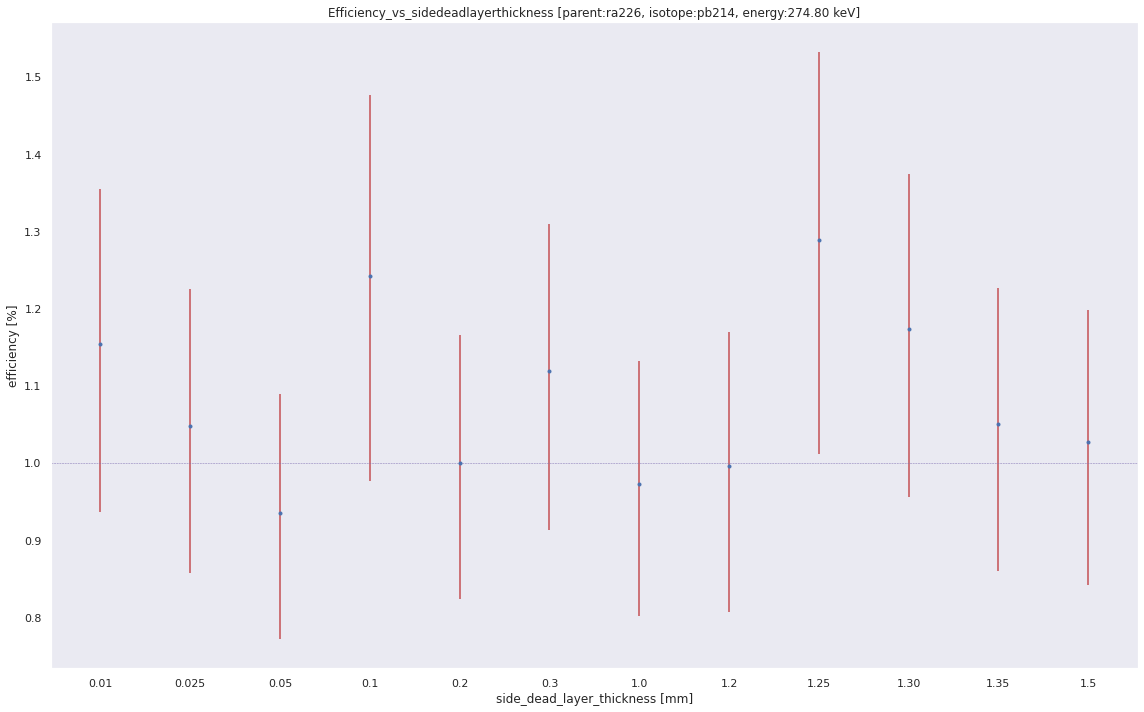


41:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  295.2228    0.823094     0.009538    0.009451
1                          0.025  ra226   pb214  295.2228    0.822978     0.009585    0.009511
2                           0.05  ra226   pb214  295.2228    0.816194     0.009450    0.009396
3                            0.1  ra226   pb214  295.2228    0.819624     0.009757    0.009709
4                            0.2  ra226   pb214  295.2228    0.837460     0.009666    0.009657
5                            0.3  ra226   pb214  295.2228    0.846323     0.009788    0.009697
6                            1.0  ra226   pb214  295.2228    0.913416     0.010829    0.010742
7                            1.2  ra226   pb214  295.2228    0.939702     0.011462    0.011413
8                           1.25  ra226   pb214  295.2228    0.932475     0.011333    0.011257
9                           1.30  ra226

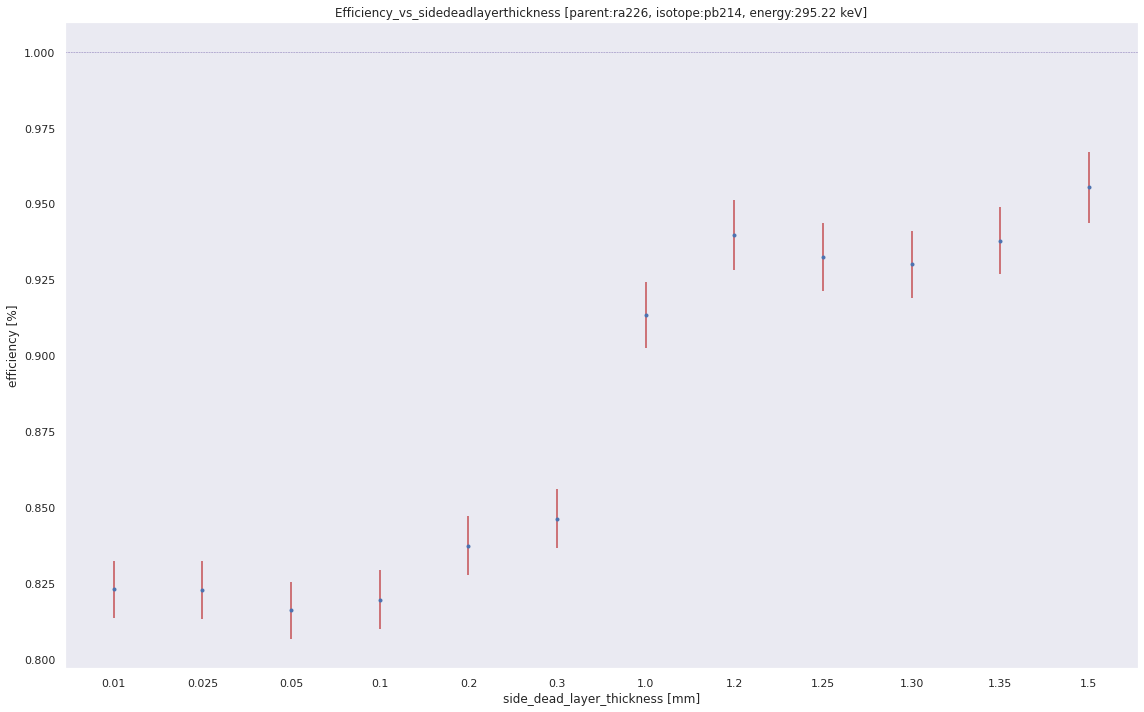


42:group:
   side_dead_layer_thickness(mm) parent isotope    energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  351.9321    0.801062     0.006614    0.006593
1                          0.025  ra226   pb214  351.9321    0.818587     0.006802    0.006763
2                           0.05  ra226   pb214  351.9321    0.821023     0.006792    0.006755
3                            0.1  ra226   pb214  351.9321    0.819881     0.006921    0.006869
4                            0.2  ra226   pb214  351.9321    0.832465     0.006925    0.006874
5                            0.3  ra226   pb214  351.9321    0.847318     0.007021    0.006983
6                            1.0  ra226   pb214  351.9321    0.906199     0.007614    0.007566
7                            1.2  ra226   pb214  351.9321    0.913714     0.007839    0.007809
8                           1.25  ra226   pb214  351.9321    0.921949     0.007920    0.007865
9                           1.30  ra226

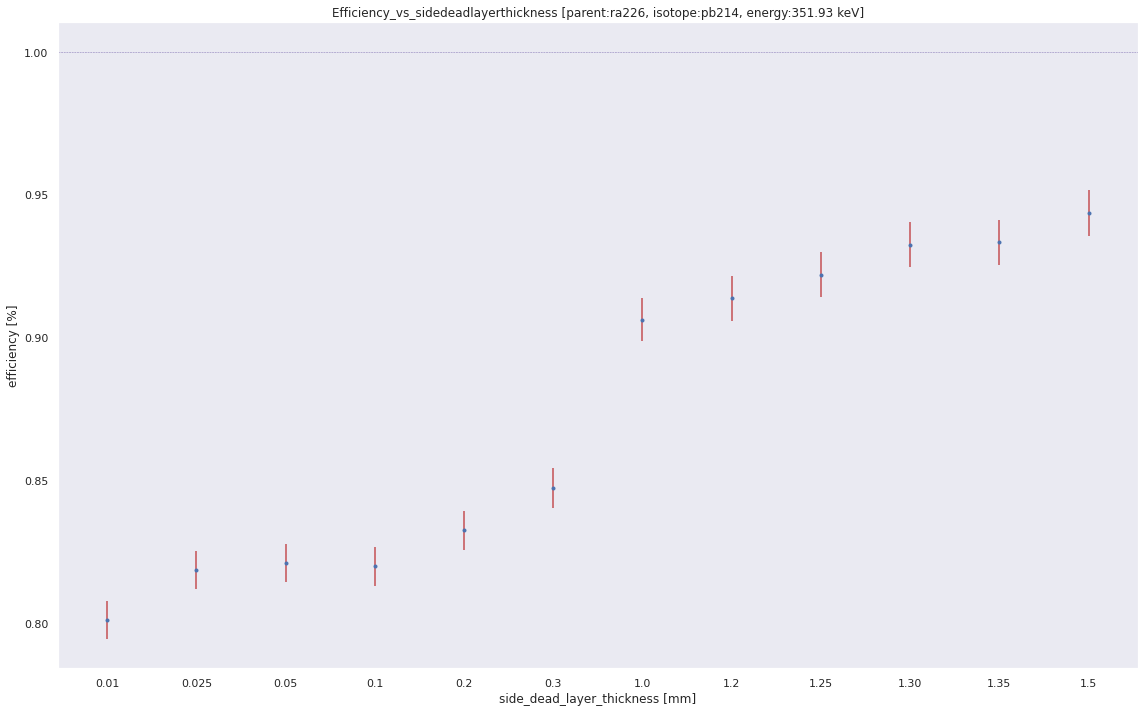


43:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  462.02    0.680593     0.182430    0.171945
1                          0.025  ra226   pb214  462.02    0.982542     0.286356    0.260377
2                           0.05  ra226   pb214  462.02    0.814680     0.225529    0.209941
3                            0.2  ra226   pb214  462.02    0.870938     0.244926    0.226198
4                            0.3  ra226   pb214  462.02    0.898378     0.254551    0.234393
5                            1.0  ra226   pb214  462.02    0.859358     0.239613    0.222507
6                            1.2  ra226   pb214  462.02    0.669145     0.184087    0.171104
7                           1.25  ra226   pb214  462.02    1.062598     0.284910    0.298563
8                           1.30  ra226   pb214  462.02    0.895540     0.253992    0.233409
9                           1.35  ra226   pb214  462.02    

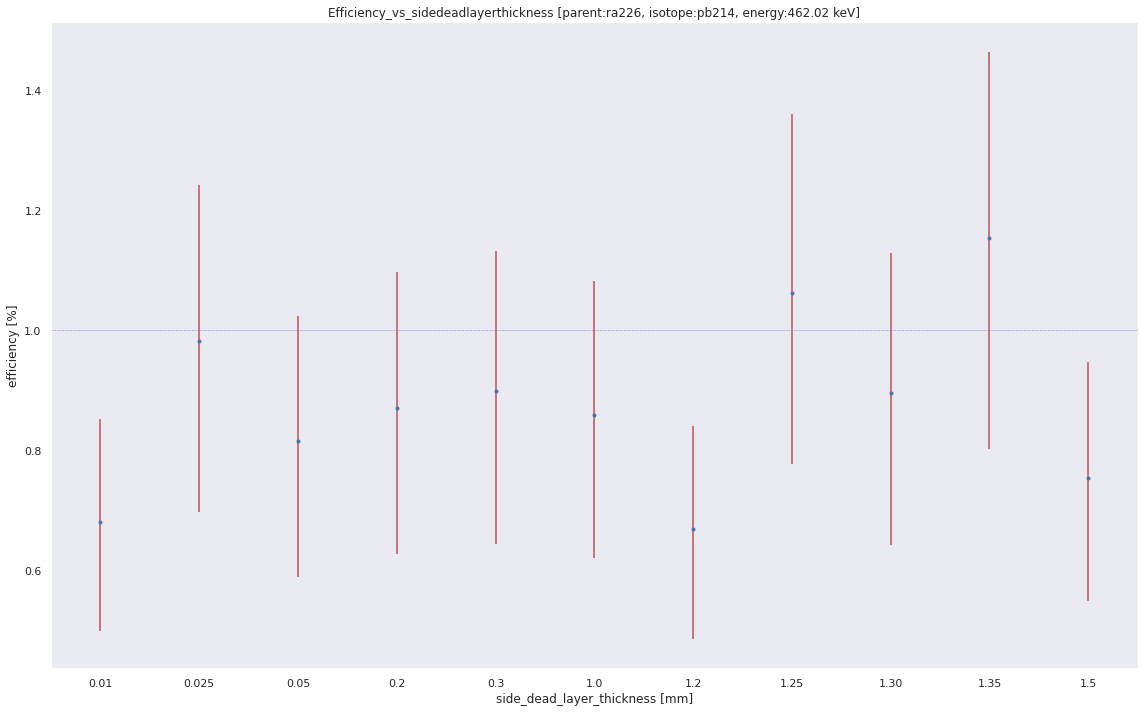


44:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  480.432    0.754706     0.152305    0.144918
1                          0.025  ra226   pb214  480.432    0.748045     0.150882    0.144004
2                           0.05  ra226   pb214  480.432    0.779344     0.157661    0.150201
3                            0.1  ra226   pb214  480.432    0.805277     0.173114    0.161550
4                            0.2  ra226   pb214  480.432    0.783350     0.157893    0.150259
5                            0.3  ra226   pb214  480.432    0.982657     0.212696    0.198185
6                            1.0  ra226   pb214  480.432    1.246900     0.284814    0.258594
7                            1.2  ra226   pb214  480.432    0.859471     0.186736    0.173626
8                           1.25  ra226   pb214  480.432    0.869586     0.191154    0.176220
9                           1.30  ra226   pb214  

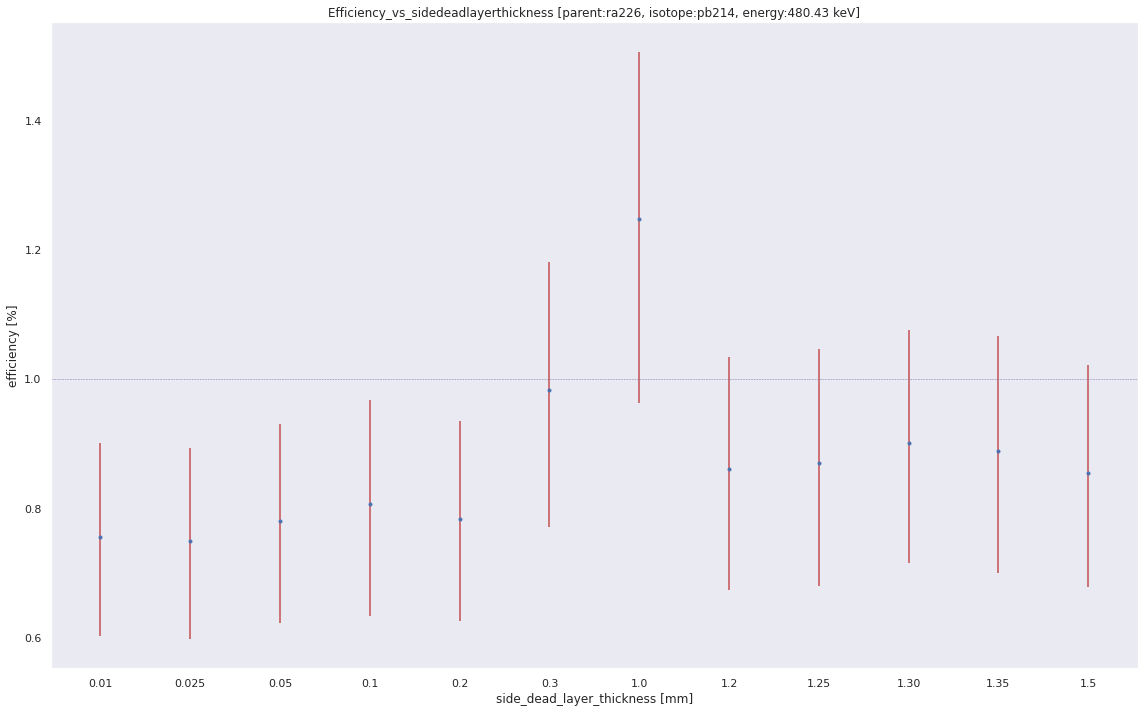


45:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  487.14    0.901354     0.117006    0.111758
1                          0.025  ra226   pb214  487.14    1.048141     0.141668    0.134318
2                           0.05  ra226   pb214  487.14    1.022306     0.136039    0.130076
3                            0.1  ra226   pb214  487.14    0.840222     0.111357    0.106497
4                            0.2  ra226   pb214  487.14    0.923778     0.119587    0.114356
5                            0.3  ra226   pb214  487.14    1.024274     0.137240    0.130971
6                            1.0  ra226   pb214  487.14    1.180008     0.165112    0.156083
7                            1.2  ra226   pb214  487.14    0.952643     0.130004    0.122823
8                           1.25  ra226   pb214  487.14    1.003526     0.140680    0.132260
9                           1.30  ra226   pb214  487.14    

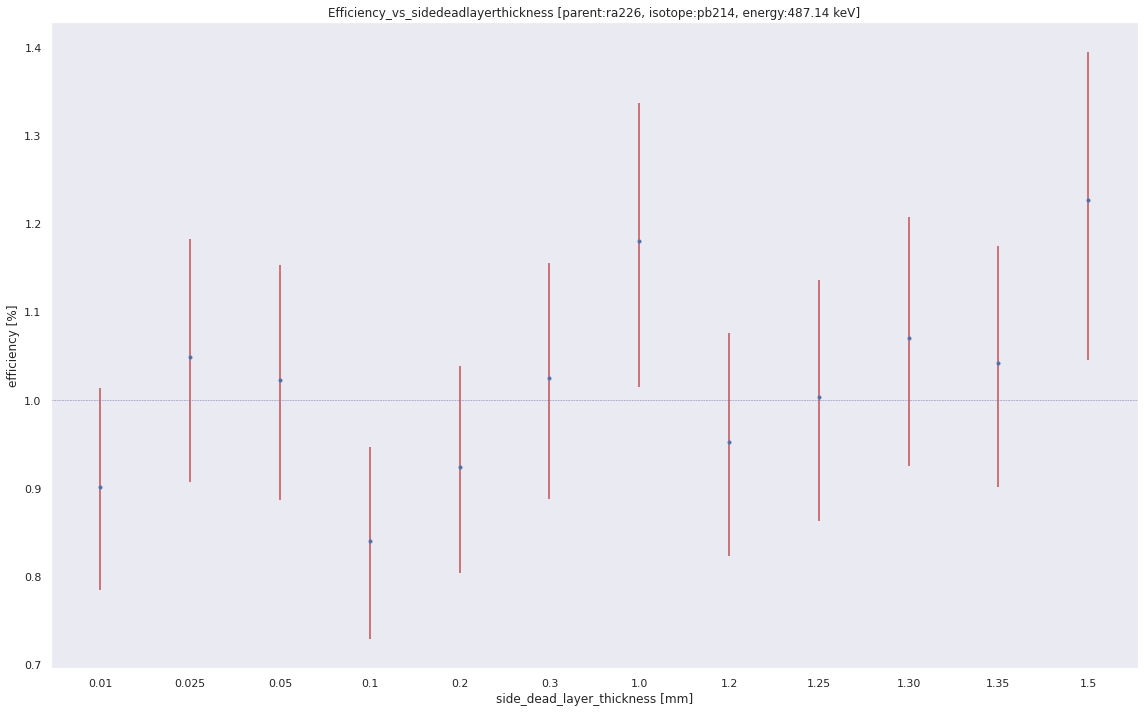


46:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  580.14    0.986970     0.174811    0.164713
1                          0.025  ra226   pb214  580.14    0.750794     0.122765    0.118021
2                           0.05  ra226   pb214  580.14    0.897451     0.151194    0.144619
3                            0.1  ra226   pb214  580.14    0.861064     0.150757    0.142736
4                            0.2  ra226   pb214  580.14    0.979221     0.172353    0.162859
5                            0.3  ra226   pb214  580.14    0.935060     0.162655    0.154260
6                            1.0  ra226   pb214  580.14    0.962790     0.165176    0.157742
7                            1.2  ra226   pb214  580.14    1.064216     0.199785    0.184743
8                           1.25  ra226   pb214  580.14    0.936342     0.168710    0.158757
9                           1.30  ra226   pb214  580.14    

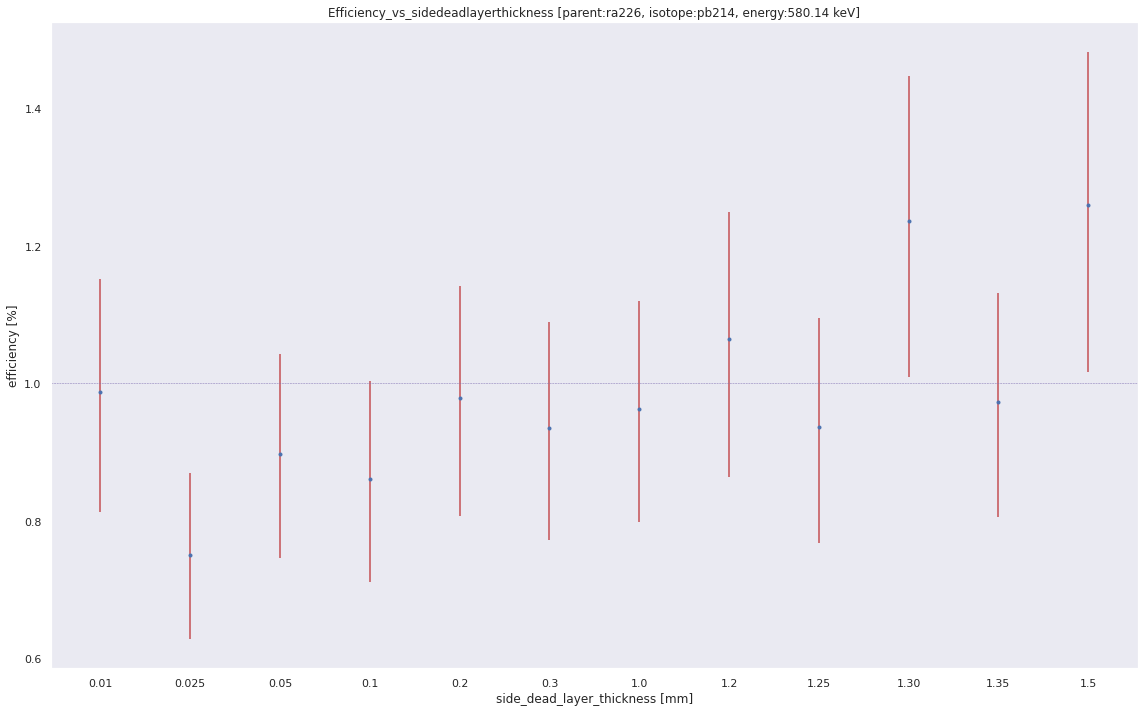


47:group:
   side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                           0.01  ra226   pb214  839.07    0.847920     0.110547    0.106434
1                          0.025  ra226   pb214  839.07    0.879438     0.112009    0.108369
2                           0.05  ra226   pb214  839.07    0.816882     0.105243    0.102097
3                            0.1  ra226   pb214  839.07    0.816376     0.109156    0.104240
4                            0.2  ra226   pb214  839.07    0.894969     0.115320    0.111348
5                            0.3  ra226   pb214  839.07    0.866432     0.110117    0.106766
6                            1.0  ra226   pb214  839.07    0.892798     0.113946    0.110718
7                            1.2  ra226   pb214  839.07    0.834982     0.111179    0.106457
8                           1.25  ra226   pb214  839.07    0.980167     0.137312    0.129649
9                           1.30  ra226   pb214  839.07    

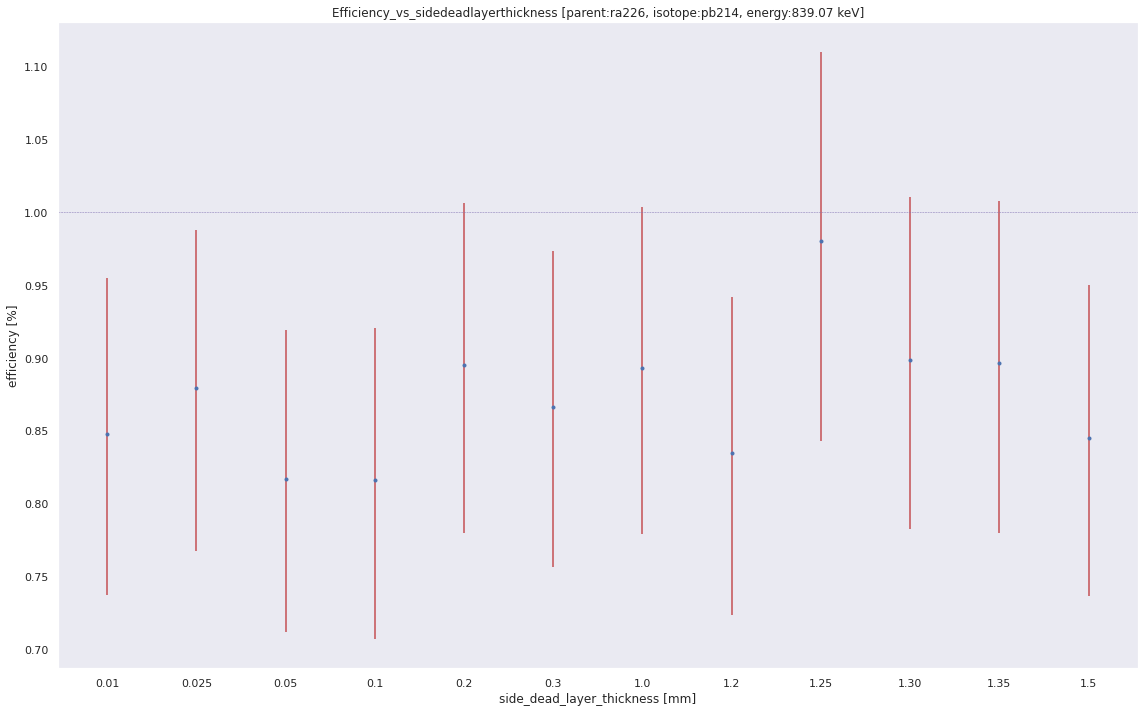


48:group:
   side_dead_layer_thickness(mm) parent isotope   energy  efficiency  error_minus  error_plus
0                           0.01  ra226   ra226  186.211    0.791917     0.029197    0.028691
1                          0.025  ra226   ra226  186.211    0.808093     0.030338    0.029687
2                           0.05  ra226   ra226  186.211    0.764461     0.028325    0.027744
3                            0.1  ra226   ra226  186.211    0.780300     0.030325    0.029839
4                            0.2  ra226   ra226  186.211    0.777924     0.028729    0.028100
5                            0.3  ra226   ra226  186.211    0.836258     0.031439    0.030979
6                            1.0  ra226   ra226  186.211    0.894804     0.033737    0.033172
7                            1.2  ra226   ra226  186.211    0.919695     0.037131    0.036284
8                           1.25  ra226   ra226  186.211    0.952743     0.038864    0.038065
9                           1.30  ra226   ra226  

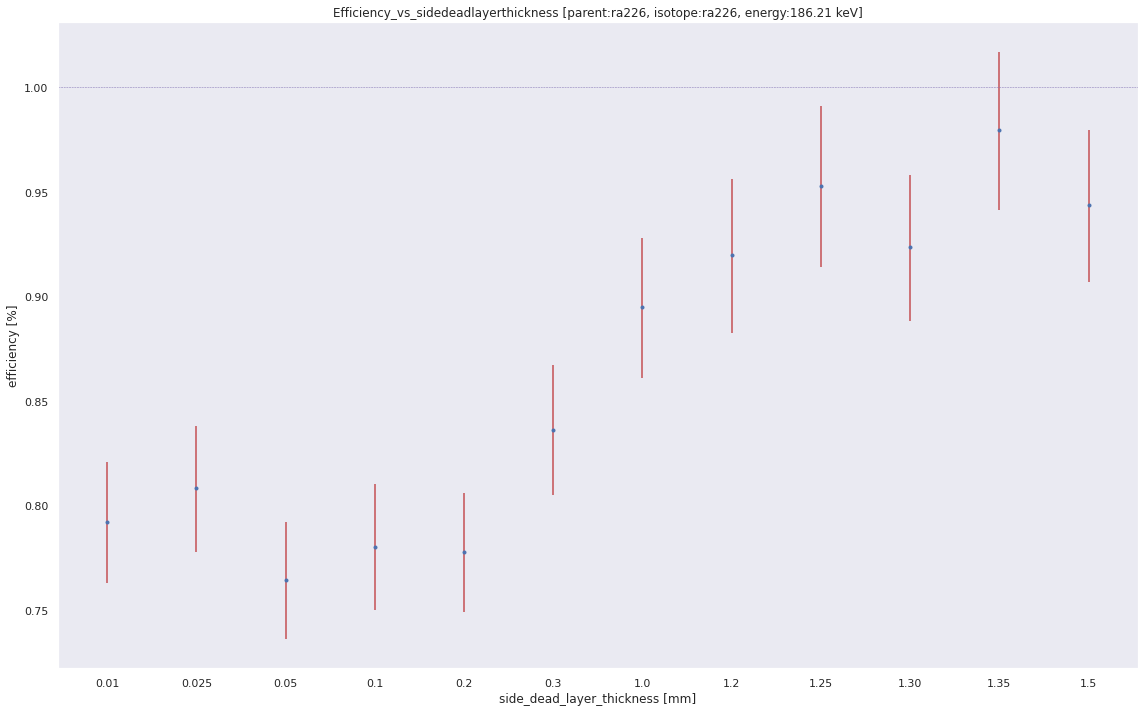

In [22]:
grouping_columns=['parent','isotope','energy']
grouped=df_plot.groupby(grouping_columns)

#get individual group
for c,(grouping_columns, group) in enumerate(grouped):
    print(f'\n{c+1}:group:\n{group.reset_index(drop=True).to_string()}')
    
    #getting a plot
    # df=group.copy()
    get_plot_parent_isotope_energy(group)

In [23]:
#df_plot.iloc[6:,:].plot(x='side_dead_layer_thickness(mm)',y='efficiency',grid=True,figsize=(12,8),yerr=df_plot['y_error'],style='.')
# #title info
# parent=df_plot['parent'].loc[0]
# isotope=df_plot['isotope'].loc[0]
# energy=df_plot['energy'].loc[0]
# parent,isotope,energy

# title_name=f'Efficiency_vs_sidedeadlayerthickness [parent:{parent}, isotope:{isotope}, energy:{energy:0.2f} keV]'
# save_name=f'efficiency_{parent}_{isotope}_{energy:.2f}'
# save_name


In [24]:
# fig,ax=plt.subplots(figsize=(16,10))
# x=df_plot['side_dead_layer_thickness(mm)']
# y=df_plot['efficiency']
# y_error=[df_plot['error_minus'],df_plot['error_plus']]

# #fig,ax=plt.figure()

# ax.errorbar(x,y,y_error,ecolor='r',fmt='b.')
# h_line_style={'color':'m','linestyle':'--','linewidth':0.5}
# ax.axhline(y=1,**h_line_style)
# ax.set_xlabel('side_dead_layer_thickness [mm]')
# ax.set_ylabel('efficiency [%]')
# ax.set_title(title_name)

# plt.show()